In [4]:
import math
import copy 
import tqdm
import time
import torch
import gpytorch
import pickle 
import itertools 
import warnings
import scipy
import scipy.sparse.linalg
from collections import defaultdict, OrderedDict

from math import comb
from numpy import matrix, asmatrix
from scipy.sparse.sputils import asmatrix

import random
import numpy as np
import fastmat as fm  # need 0.2a3 or later?

import matplotlib.gridspec as gridspec
warnings.filterwarnings("ignore")
from pylab import rcParams
from matplotlib import container
from matplotlib import pyplot as plt
from IPython.core.display import  HTML
from IPython.display import clear_output

import os, sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.environ['PRJ'] = "~/skisg/"
sys.path.append(os.environ['PRJ'])

random.seed(1337)
np.random.seed(1337)

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from skisg.config import SgBasisType, InterpType
from skisg.interp.sparse.basis import get_sg_comb_basis_1d

from skisg.interp.sparse.construct import G as grid_size



Kind: InterpType.LINEAR 	Boundary: SgBasisType.NAIVE 


0 1


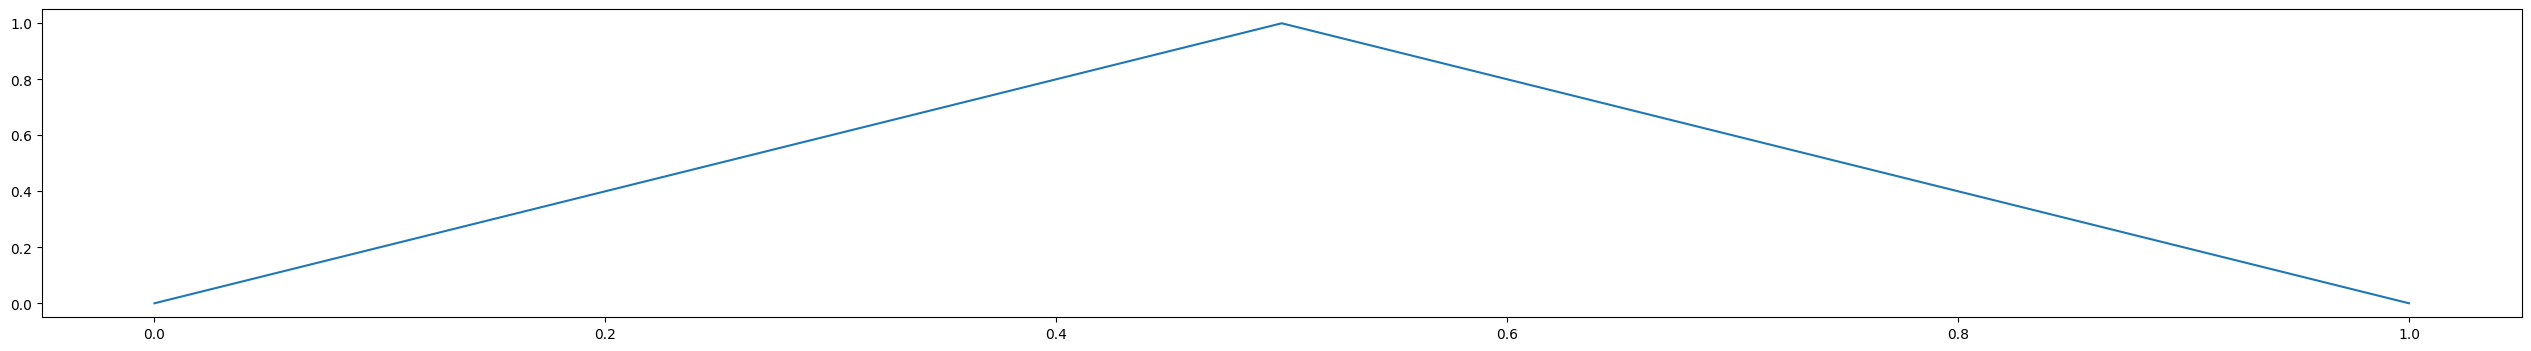

1 2


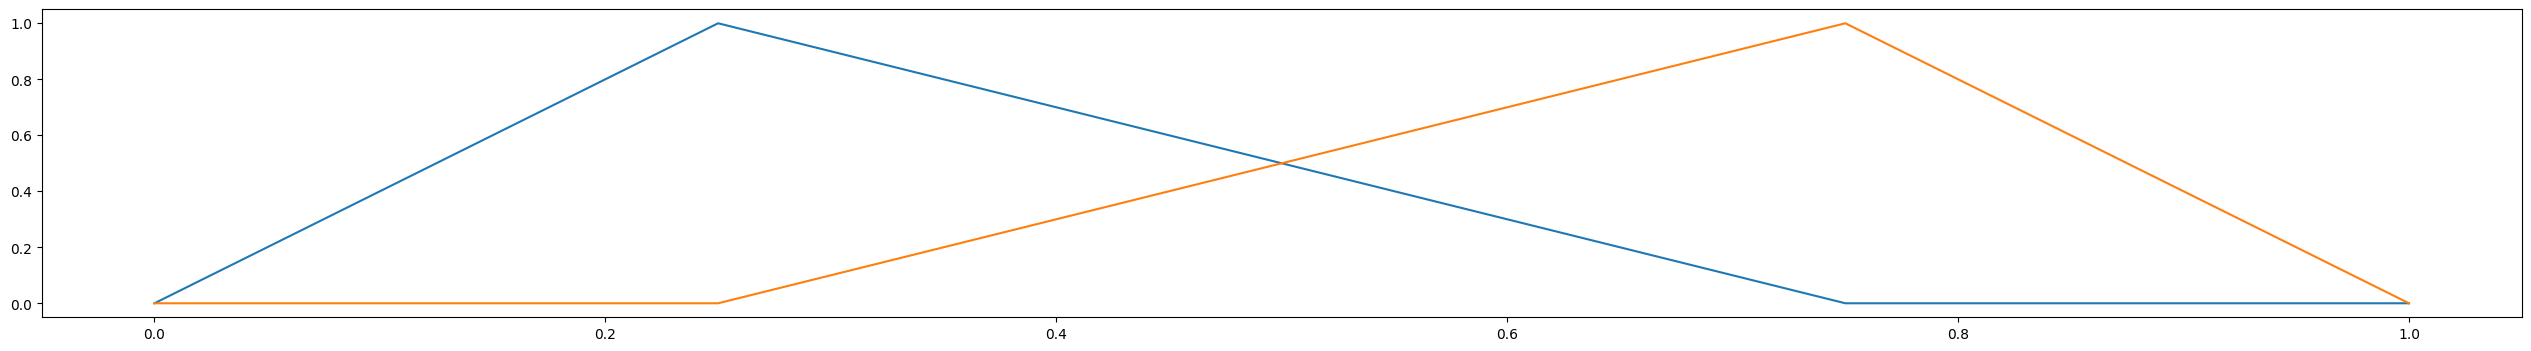

2 4


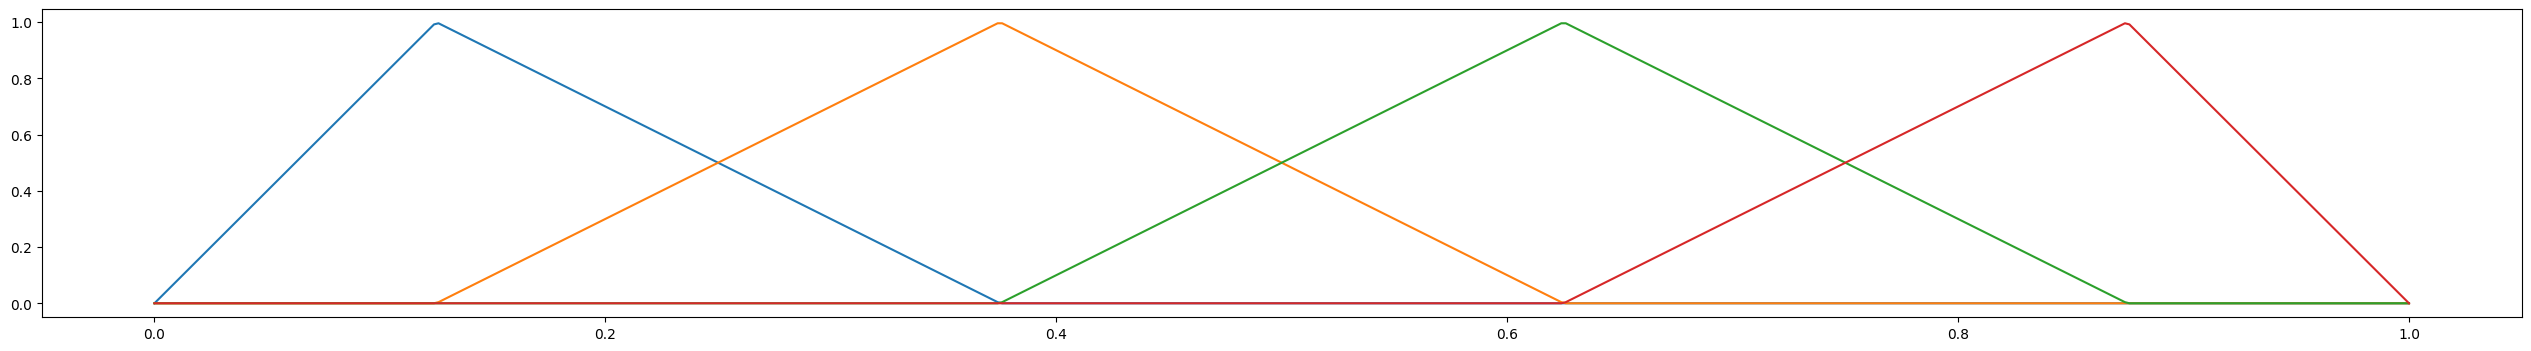

3 8


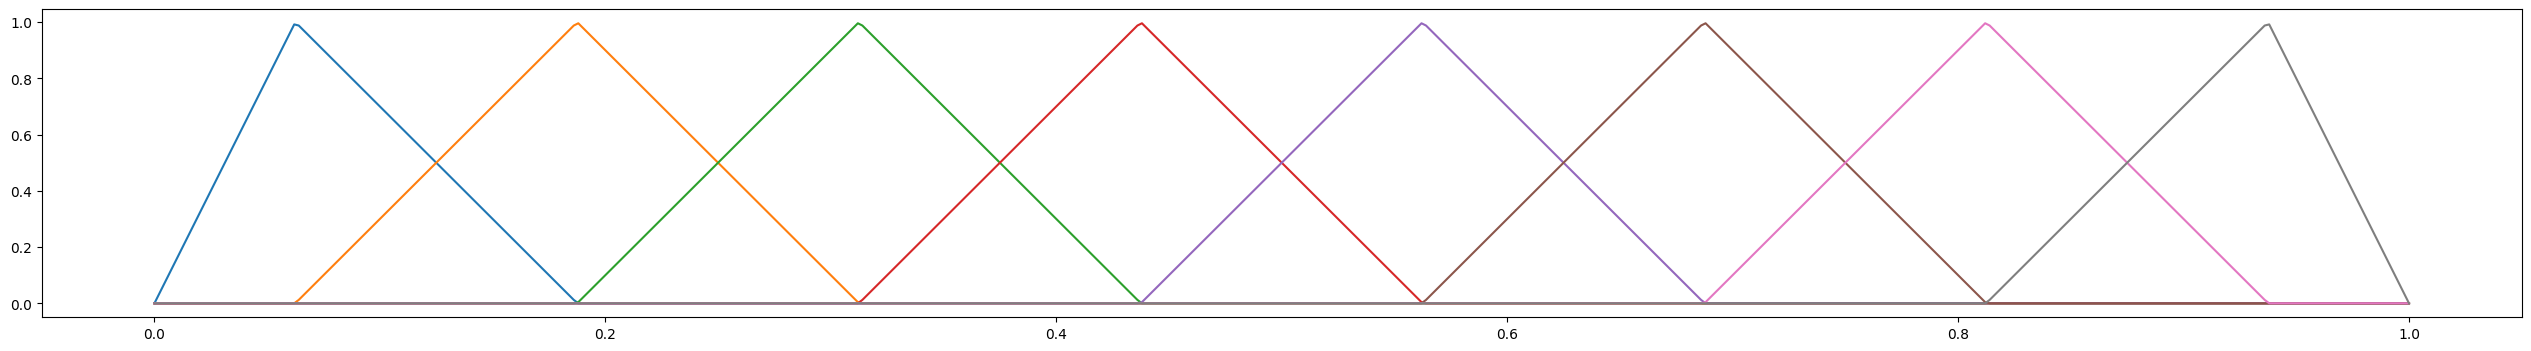

4 16


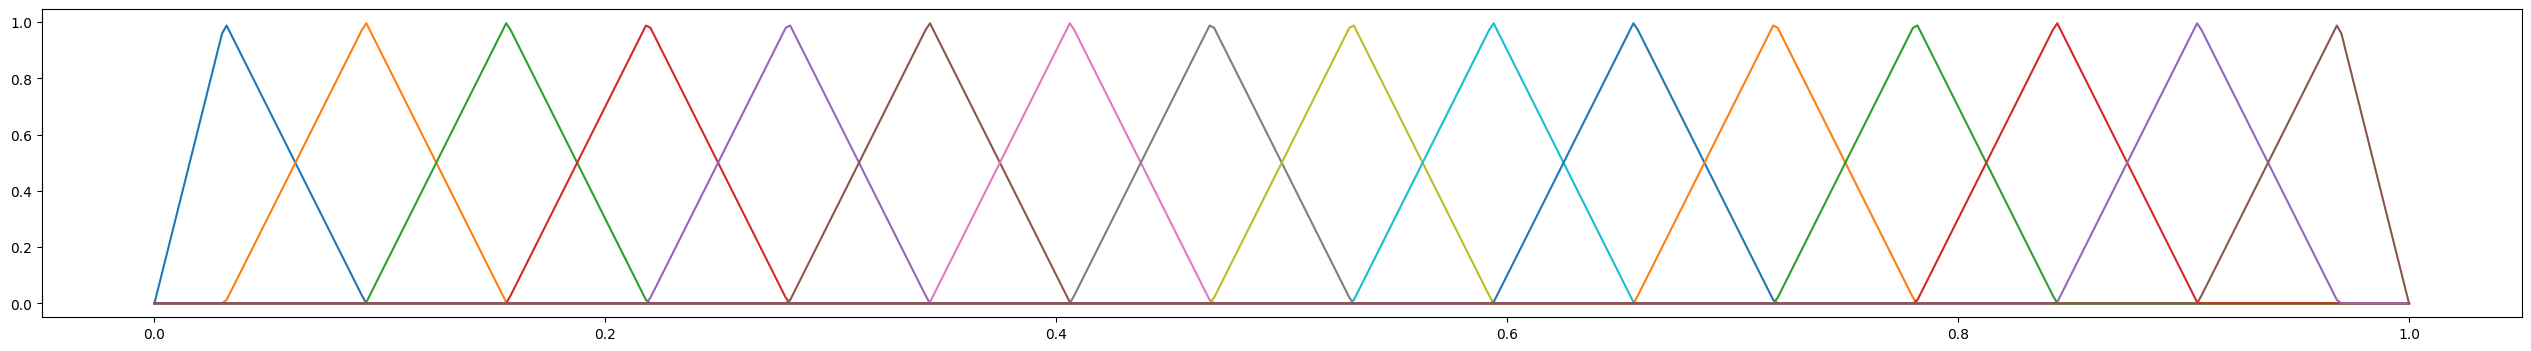



Kind: InterpType.LINEAR 	Boundary: SgBasisType.MODIFIED 


0 1


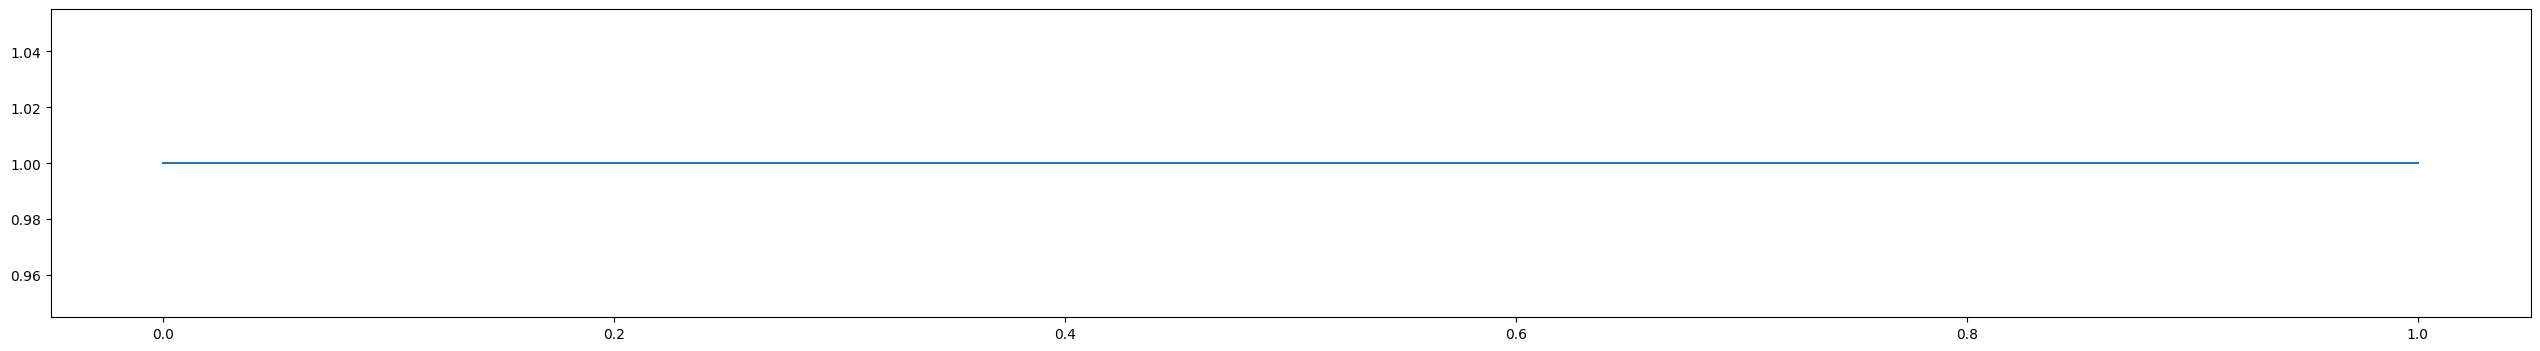

1 2


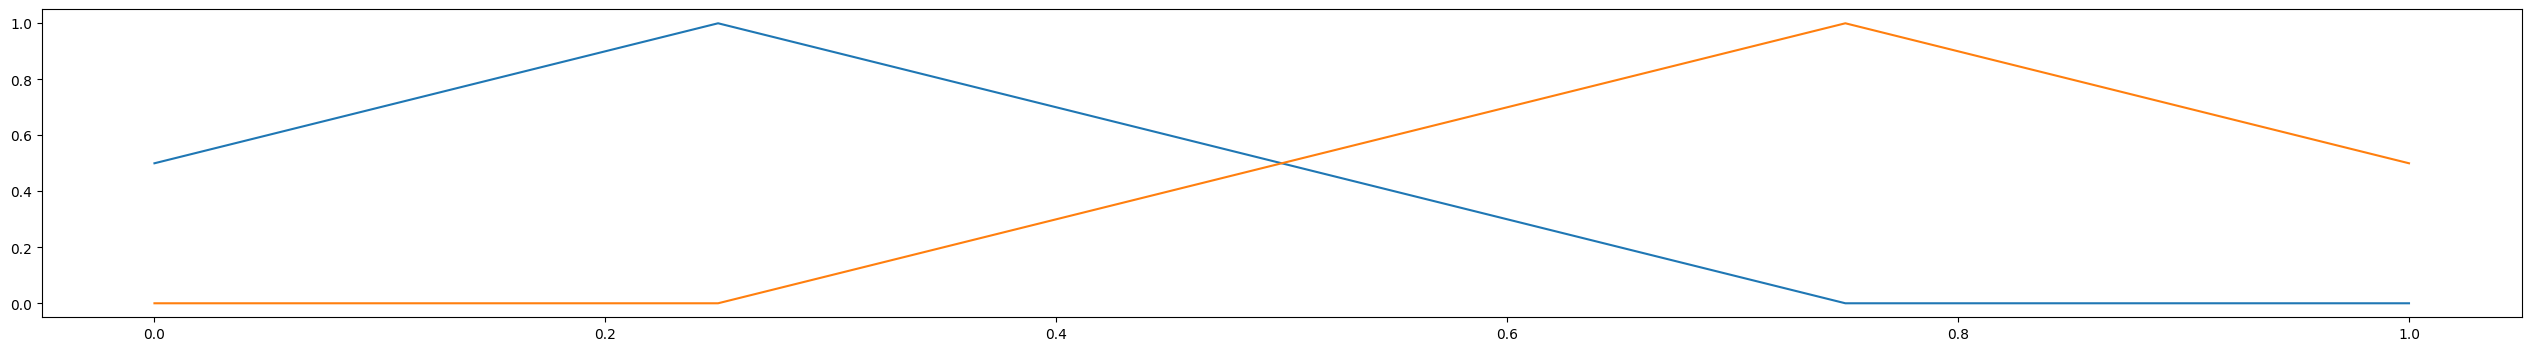

2 4


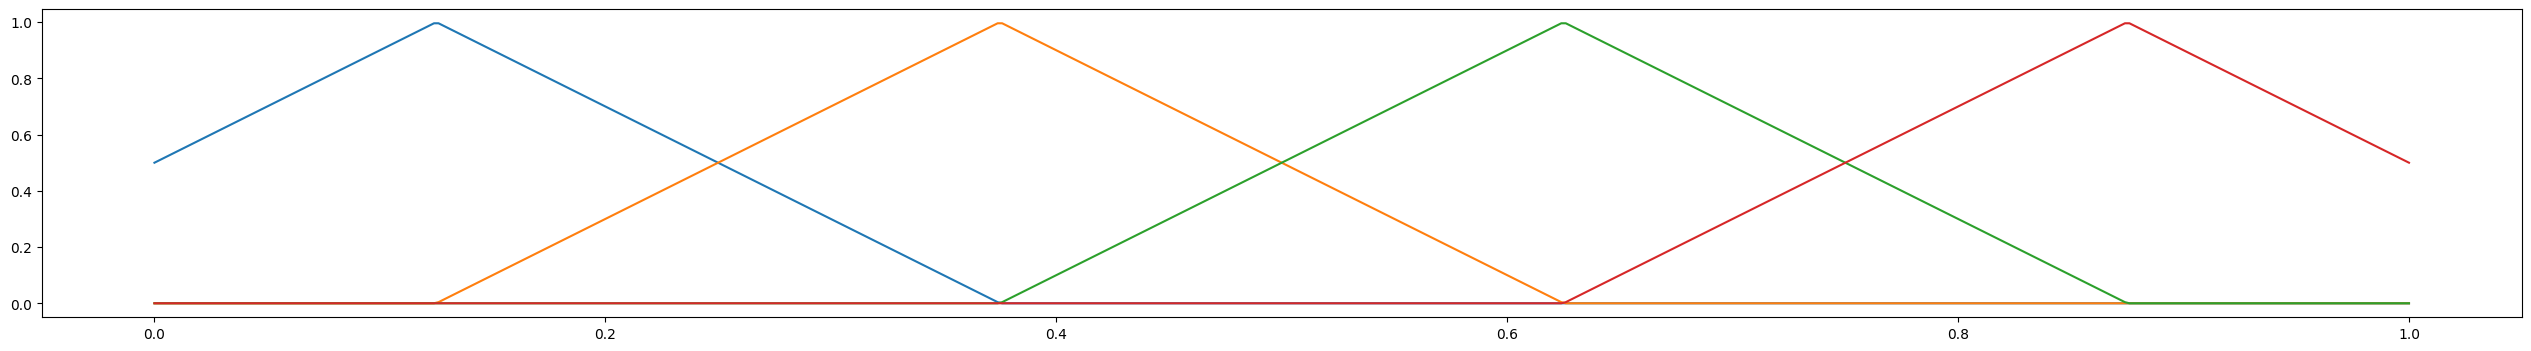

3 8


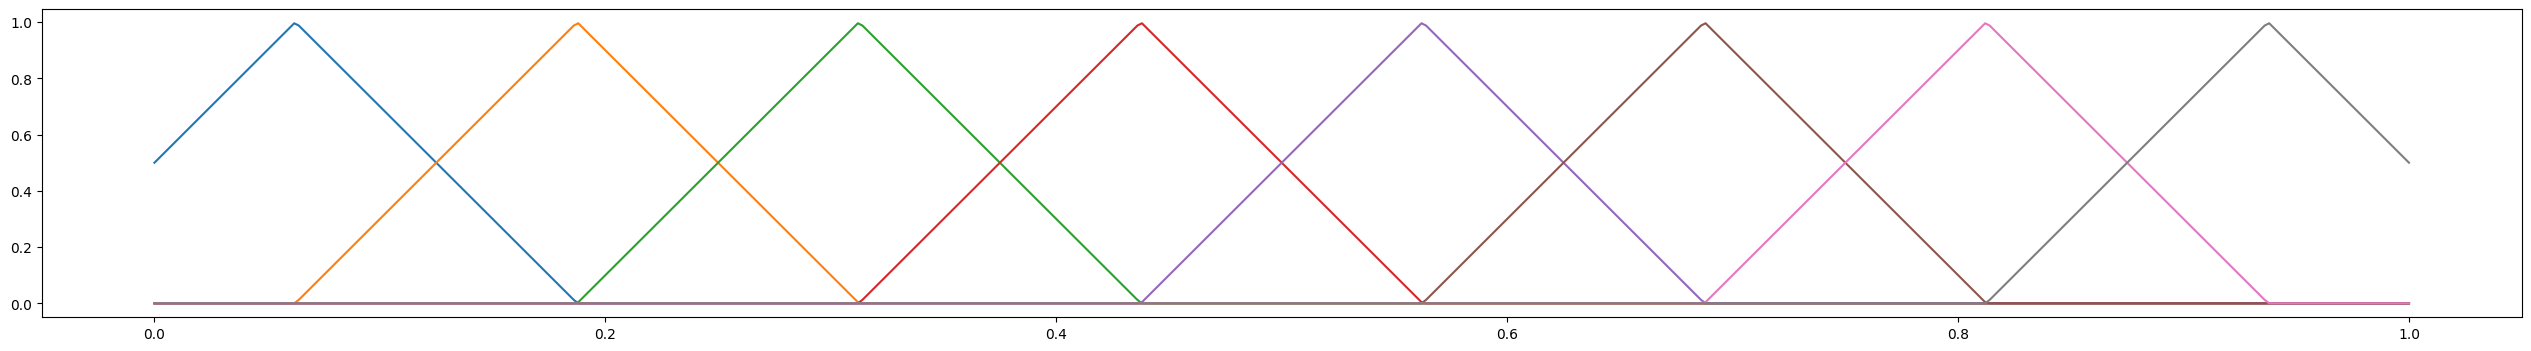

4 16


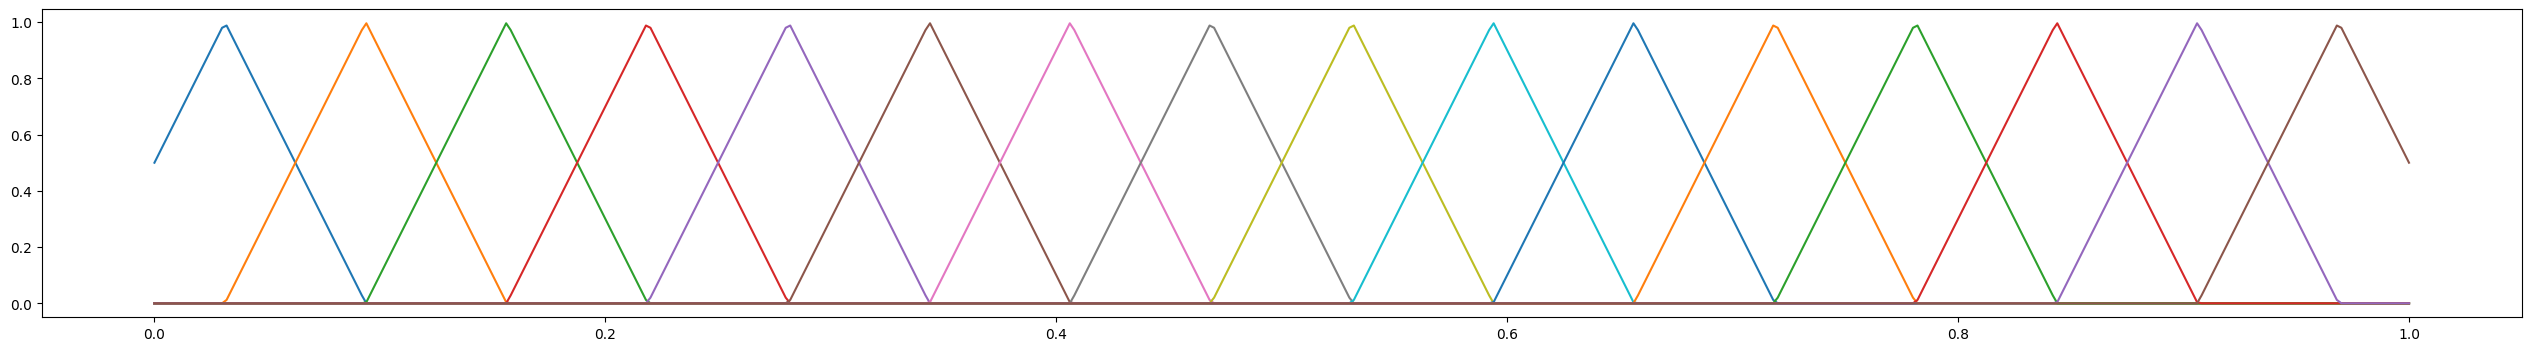



Kind: InterpType.LINEAR 	Boundary: SgBasisType.CONSSTART 


-2 1


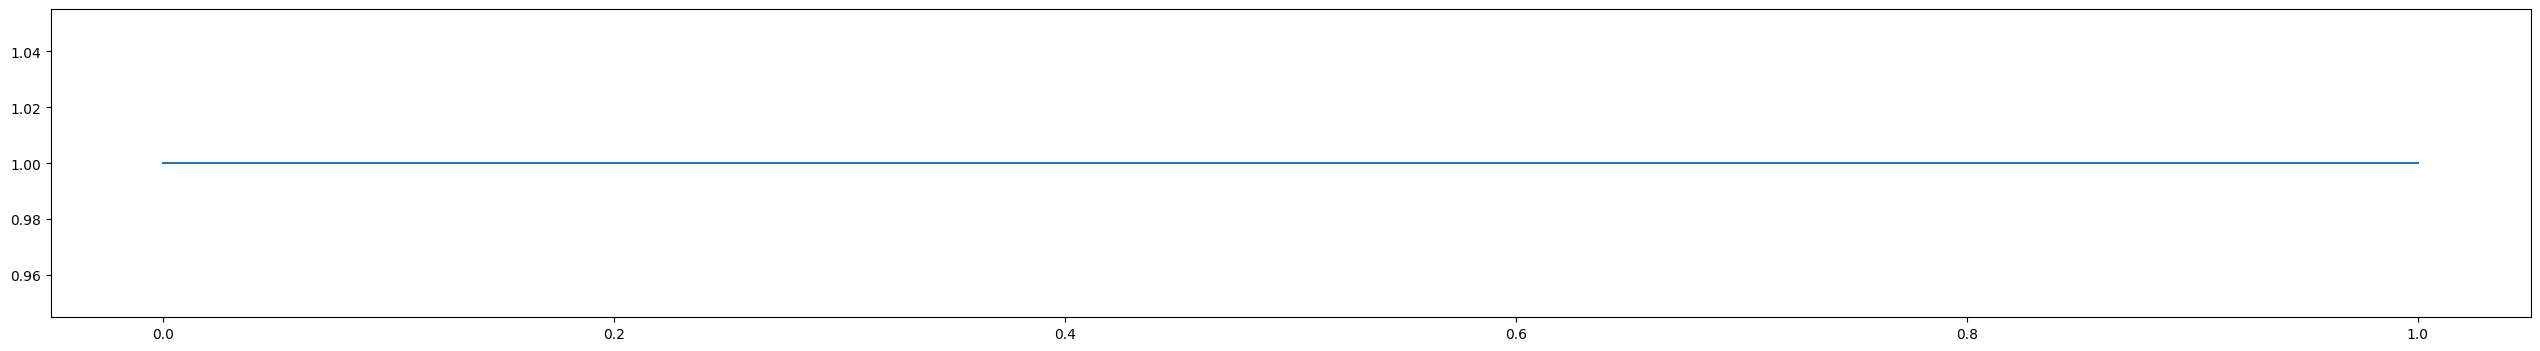

-1 2


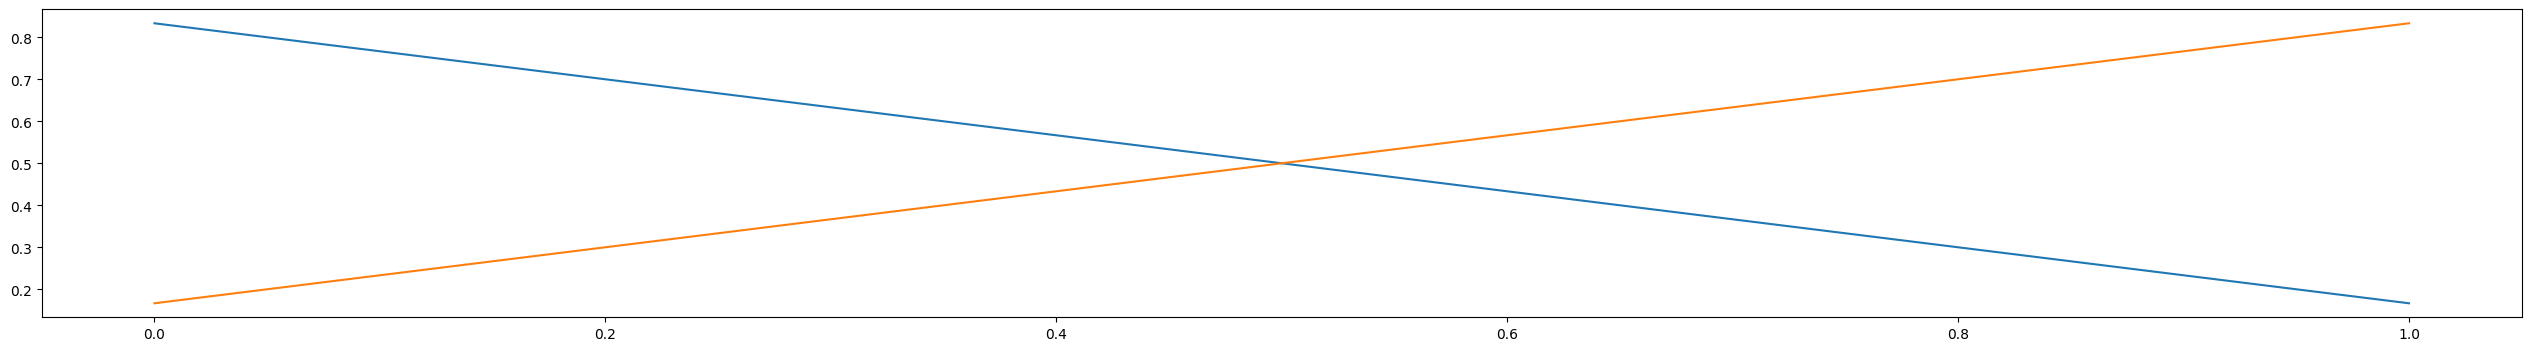

0 1


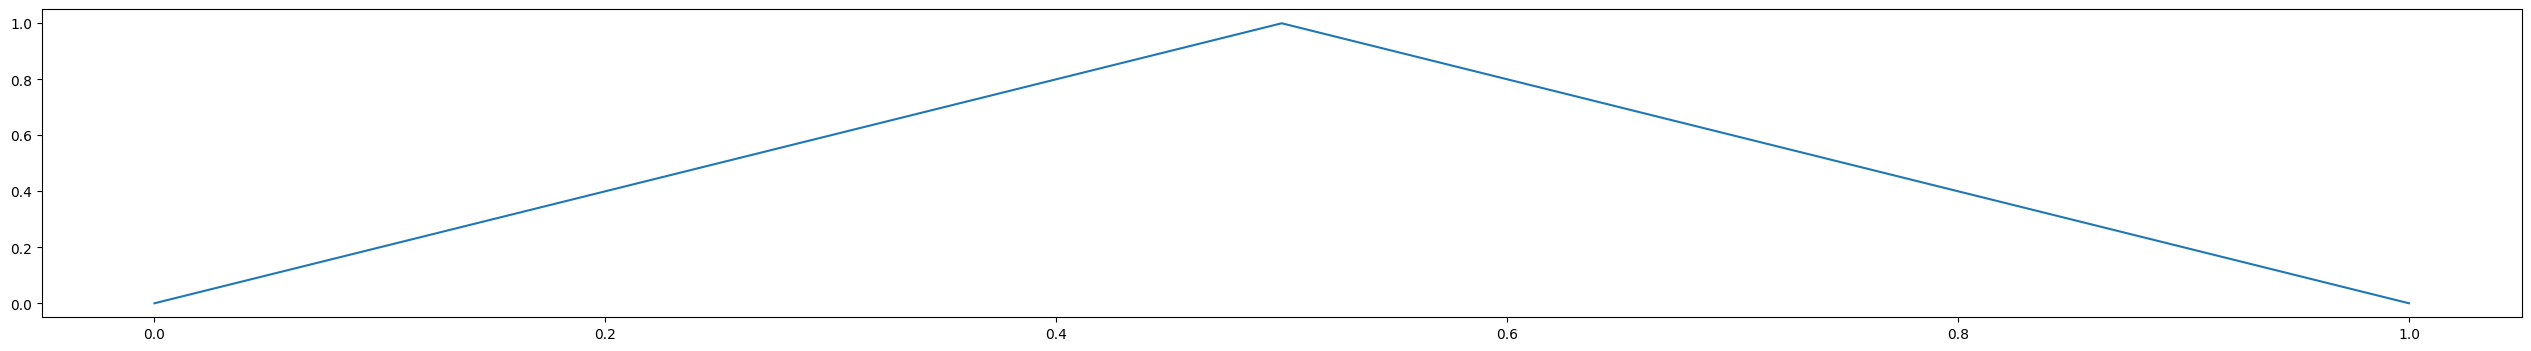

1 2


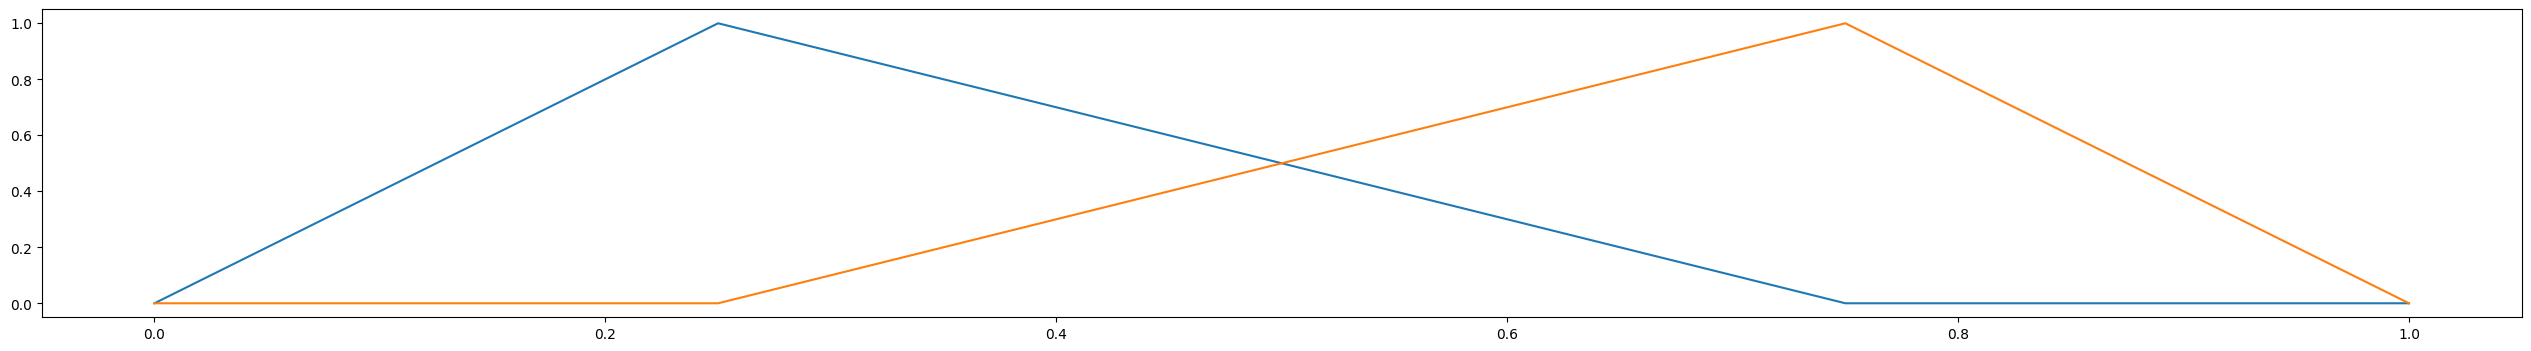

2 4


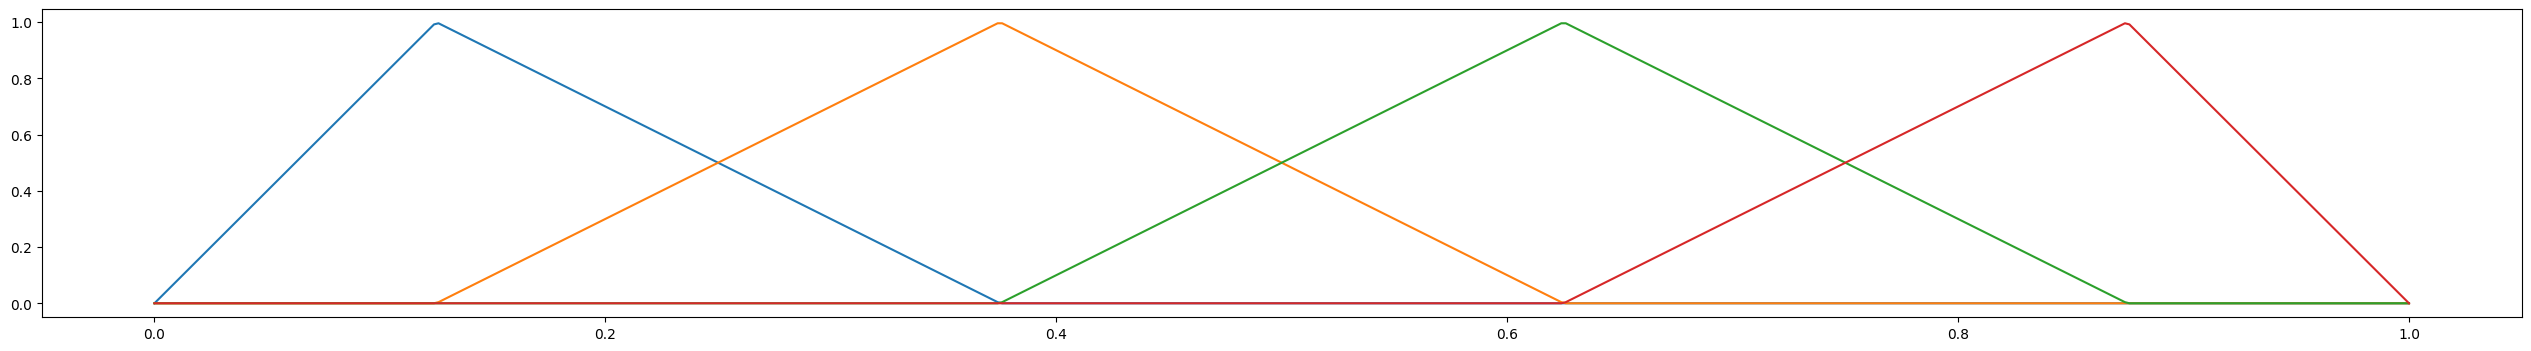

3 8


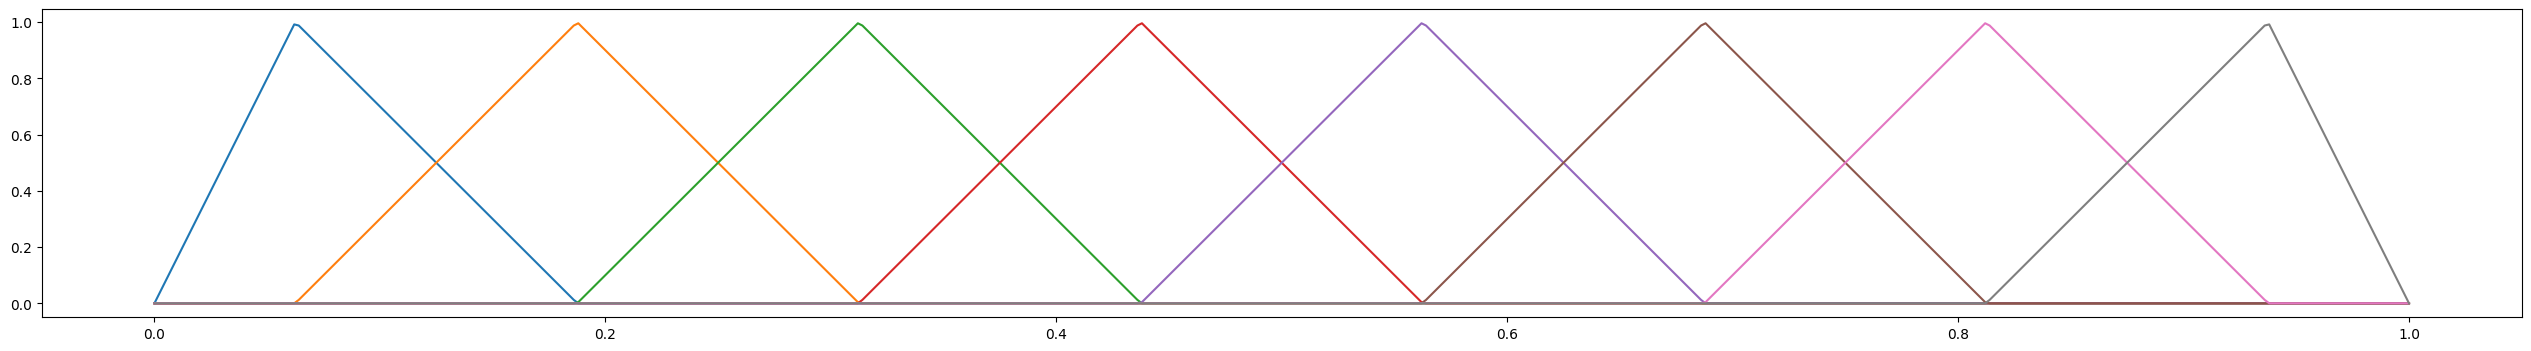

4 16


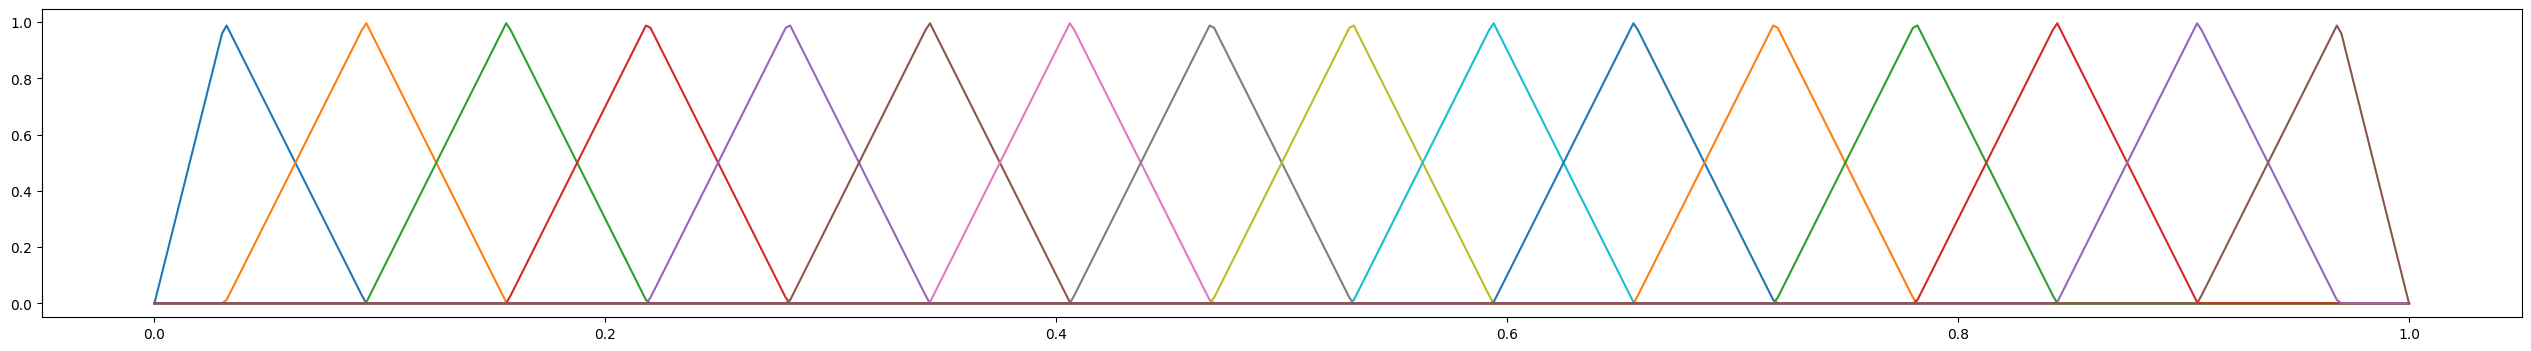



Kind: InterpType.LINEAR 	Boundary: SgBasisType.BOUNDSTART 


0 3


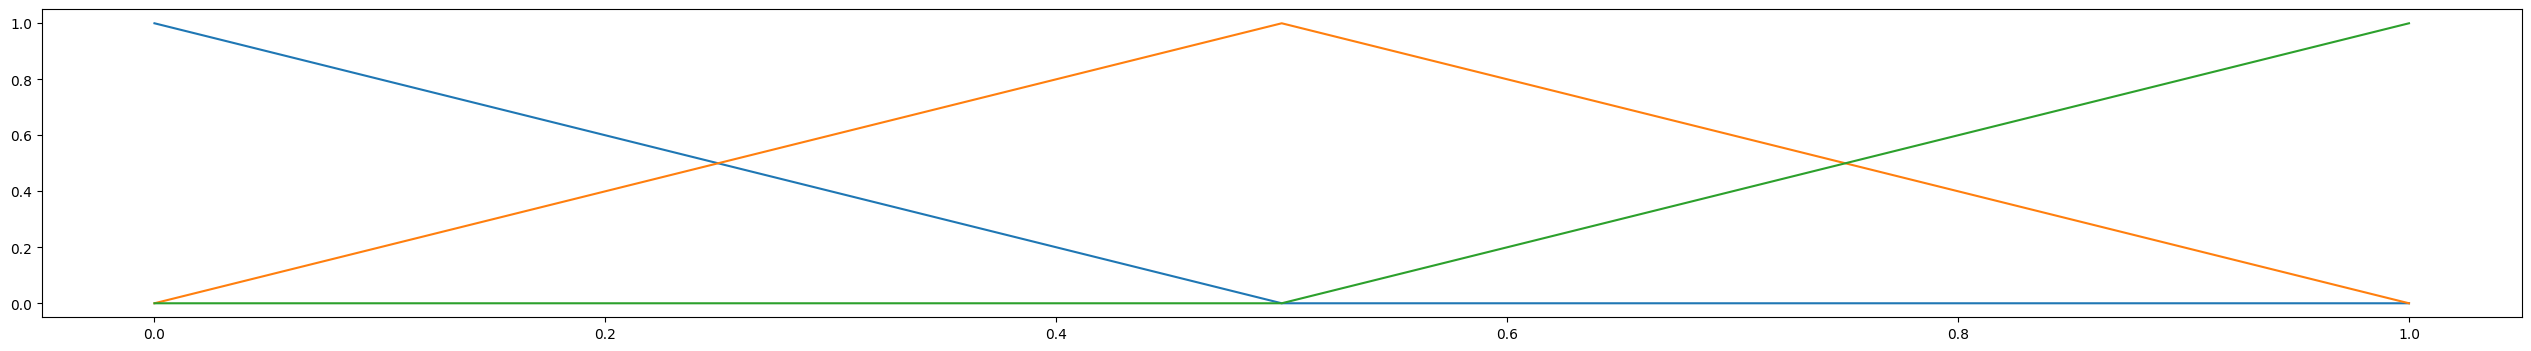

1 2


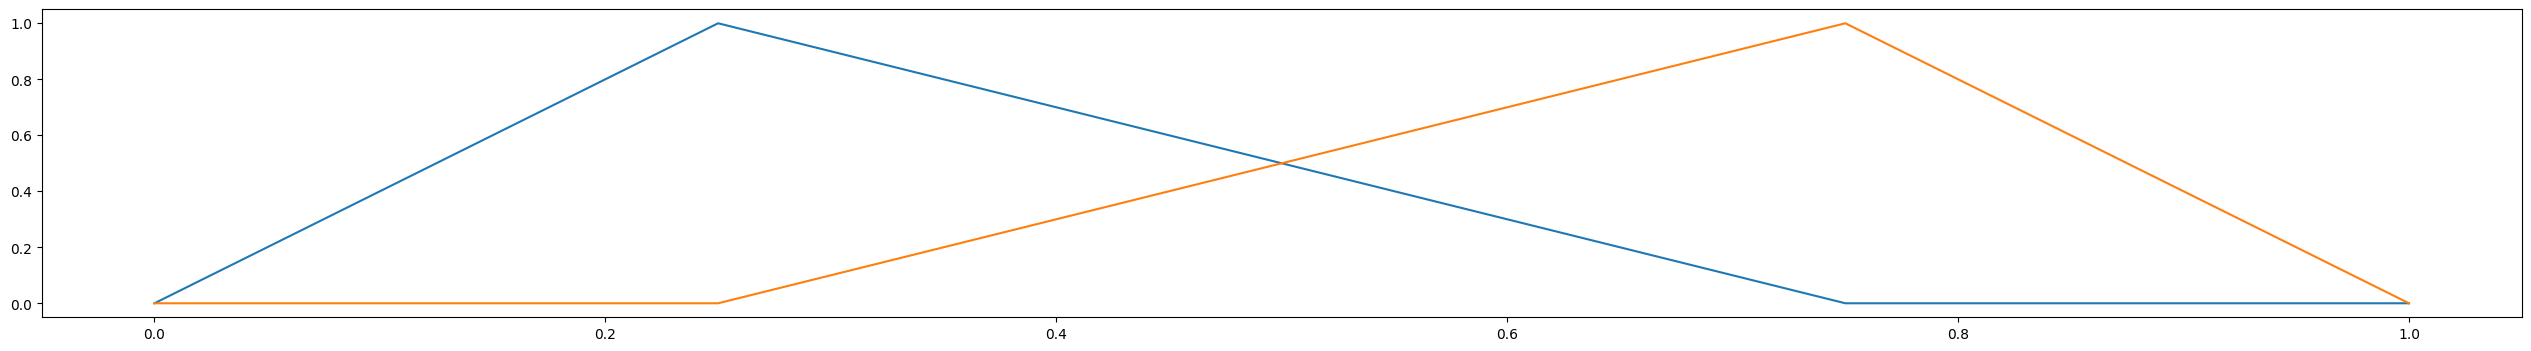

2 4


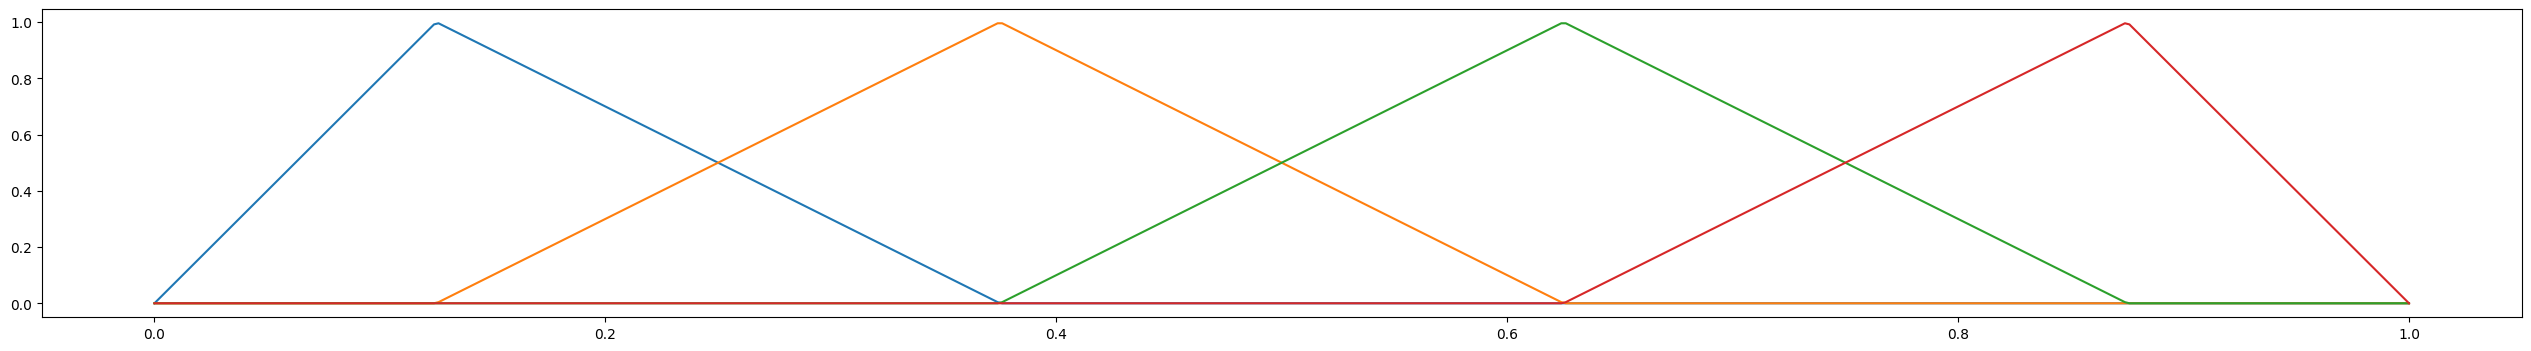

3 8


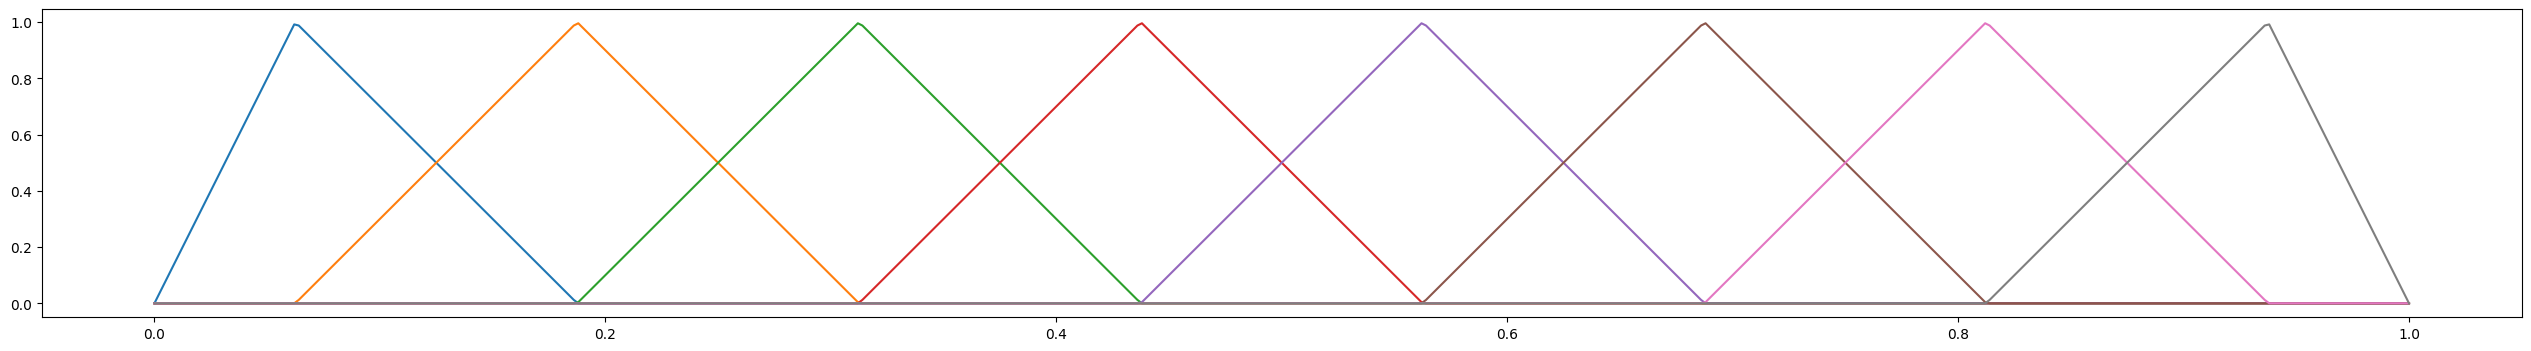

4 16


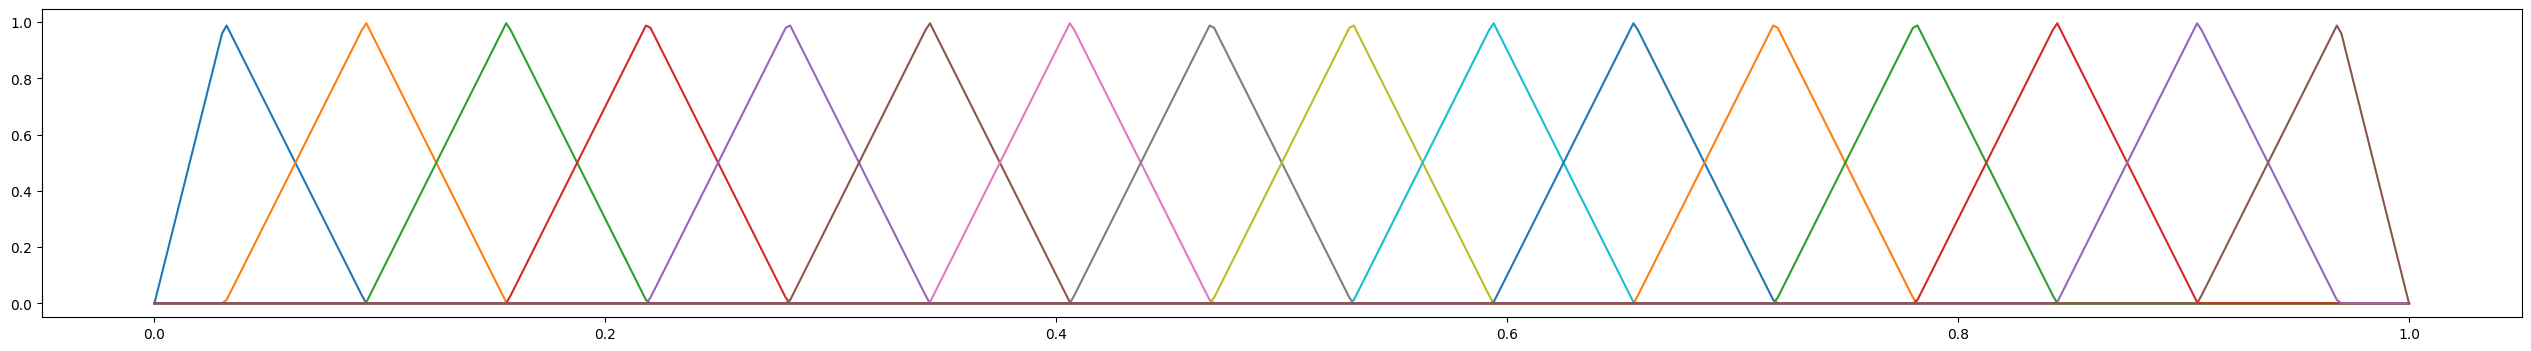



Kind: InterpType.CUBIC 	Boundary: SgBasisType.NAIVE 


0 1


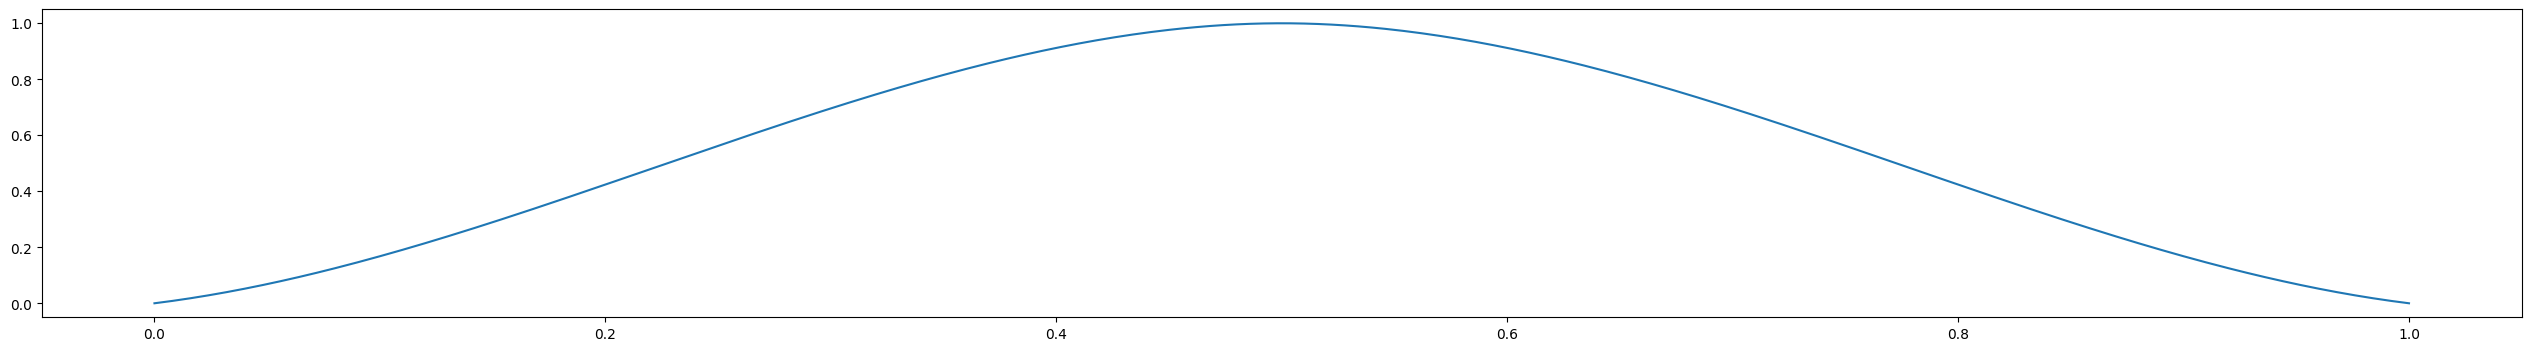

1 2


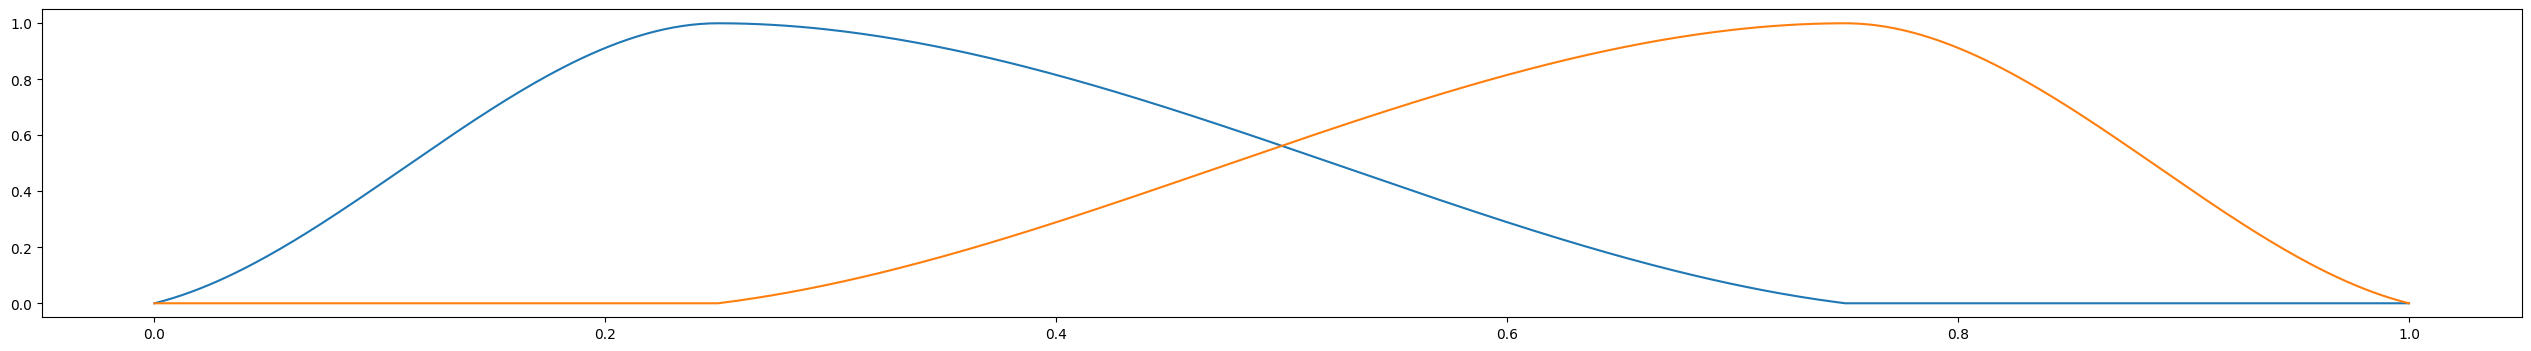

2 4


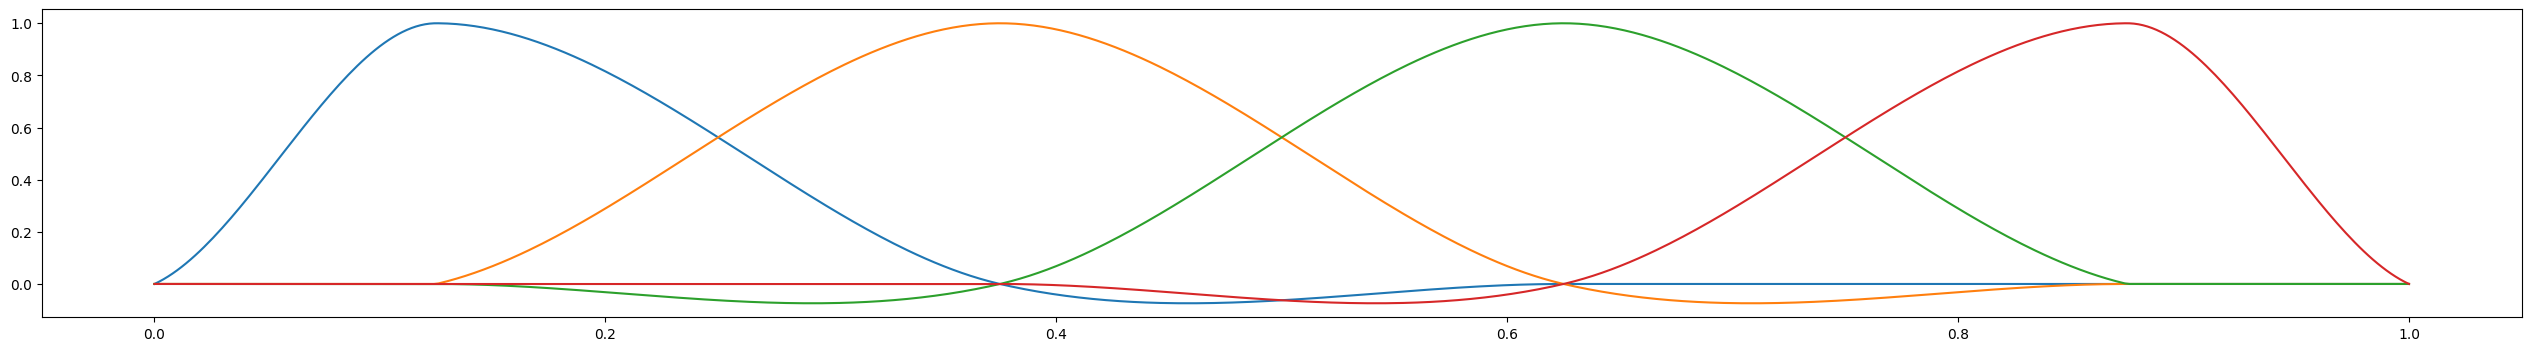

3 8


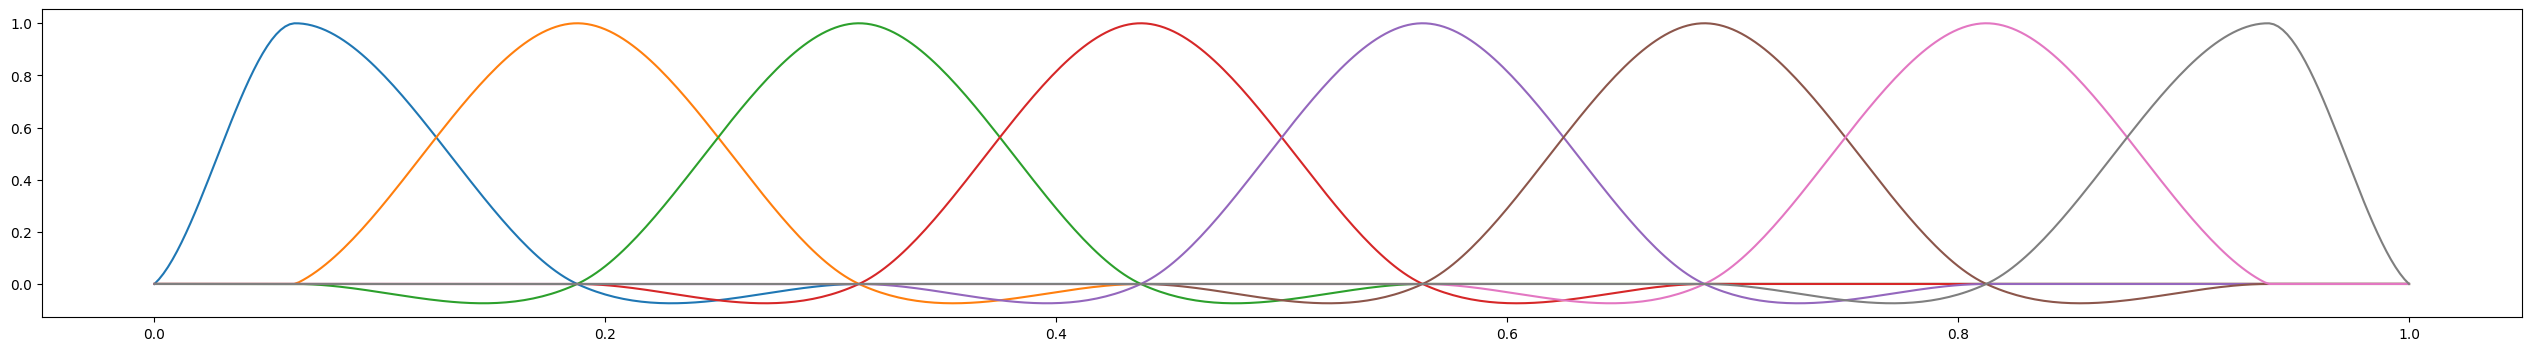

4 16


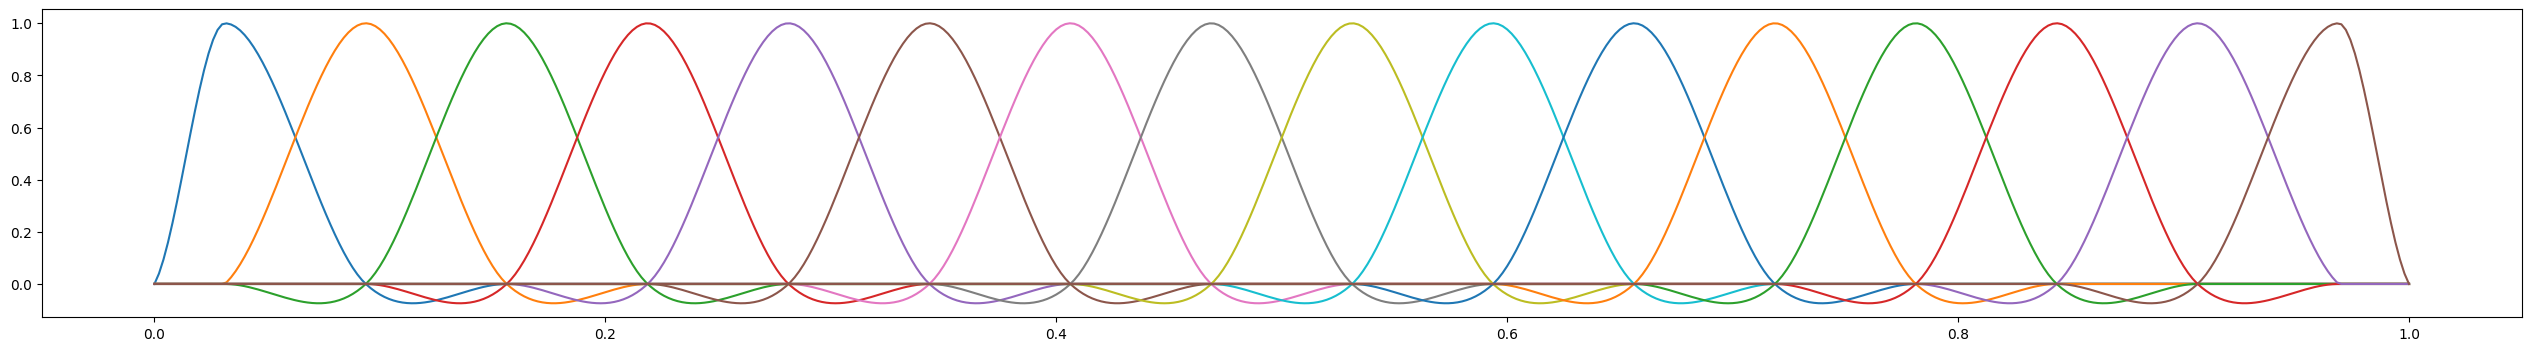



Kind: InterpType.CUBIC 	Boundary: SgBasisType.MODIFIED 


0 1


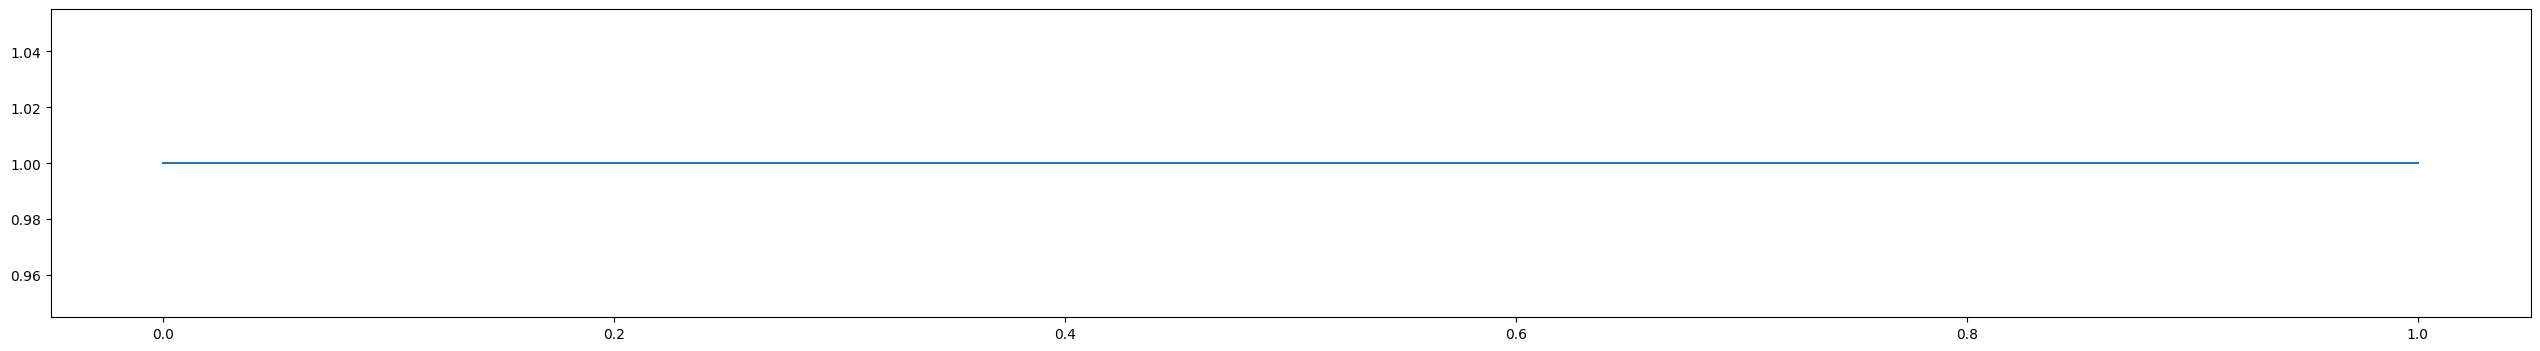

1 2


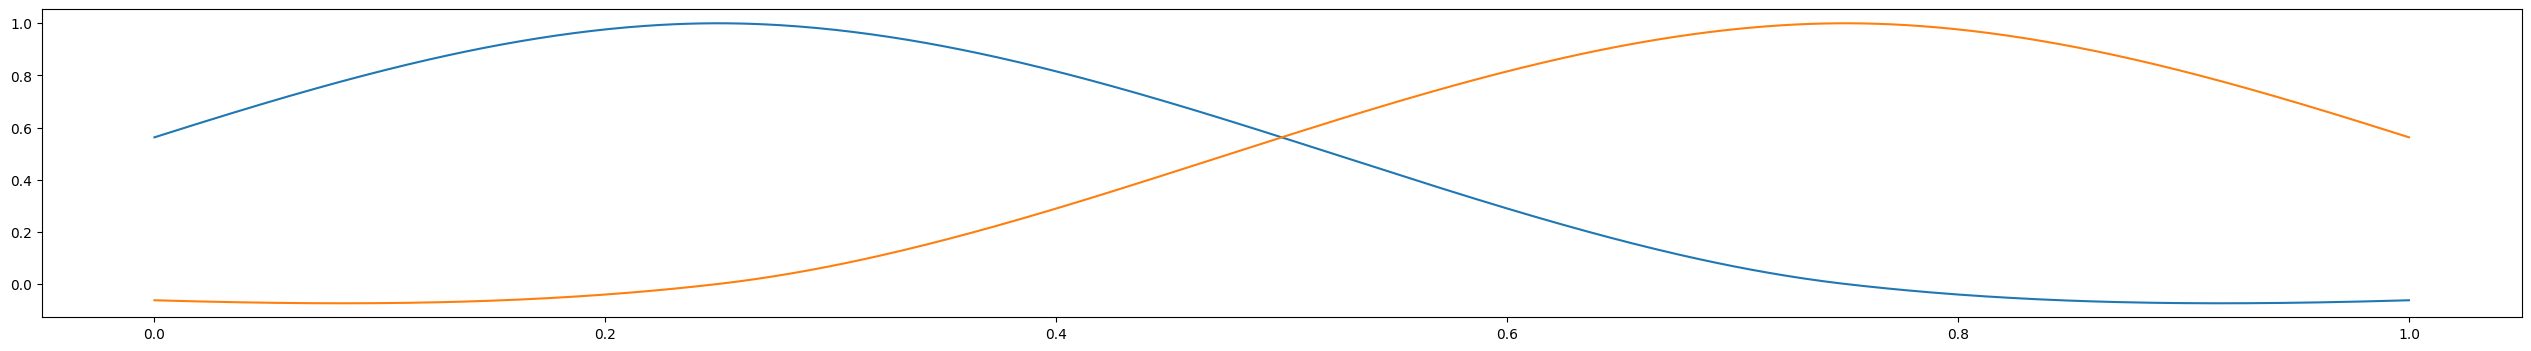

2 4


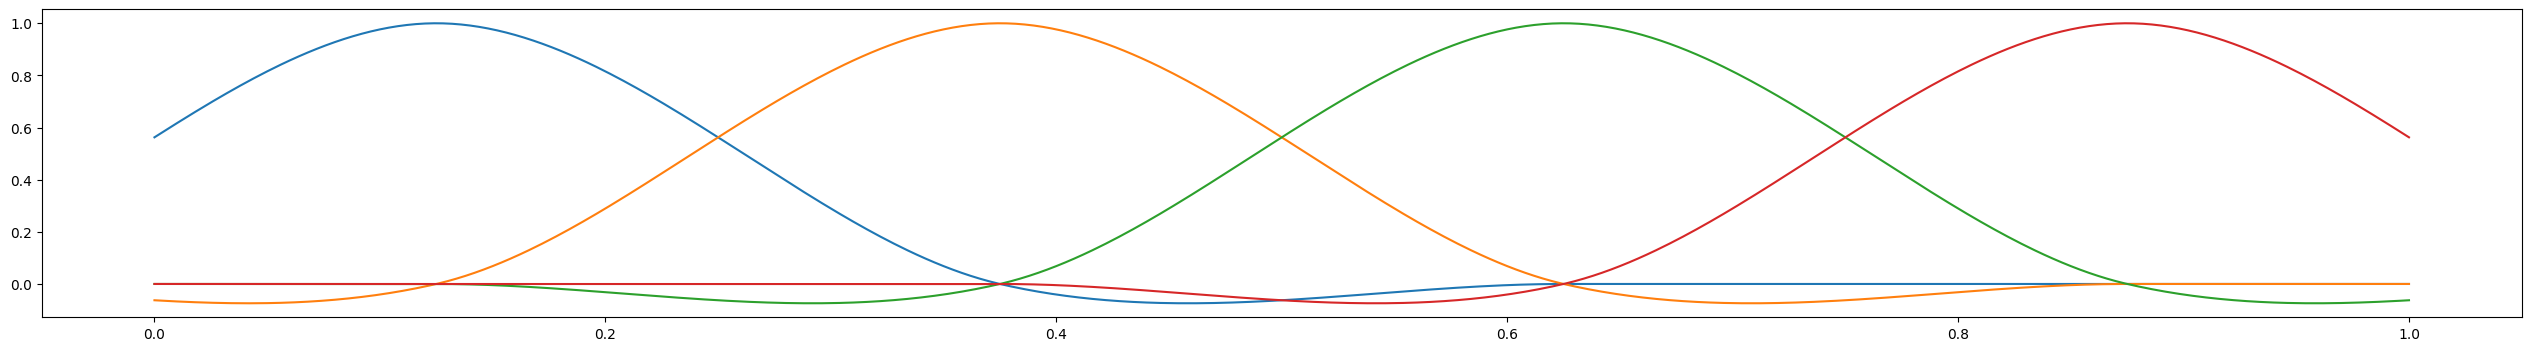

3 8


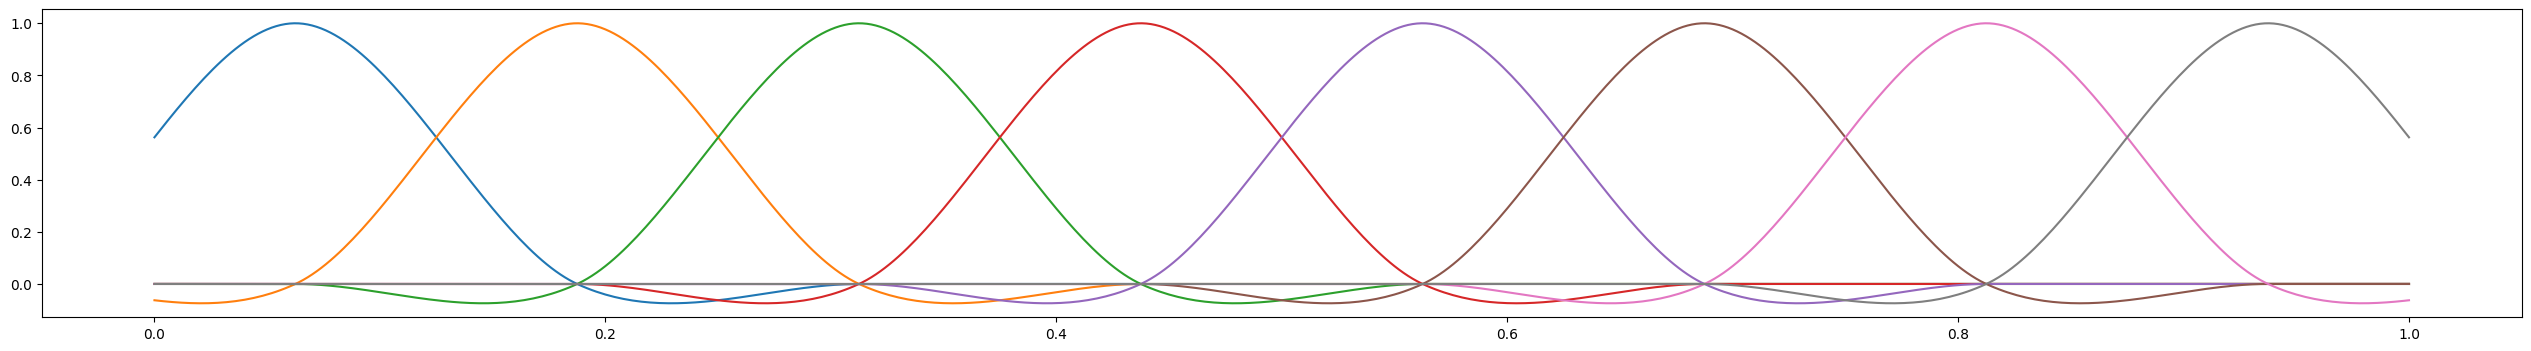

4 16


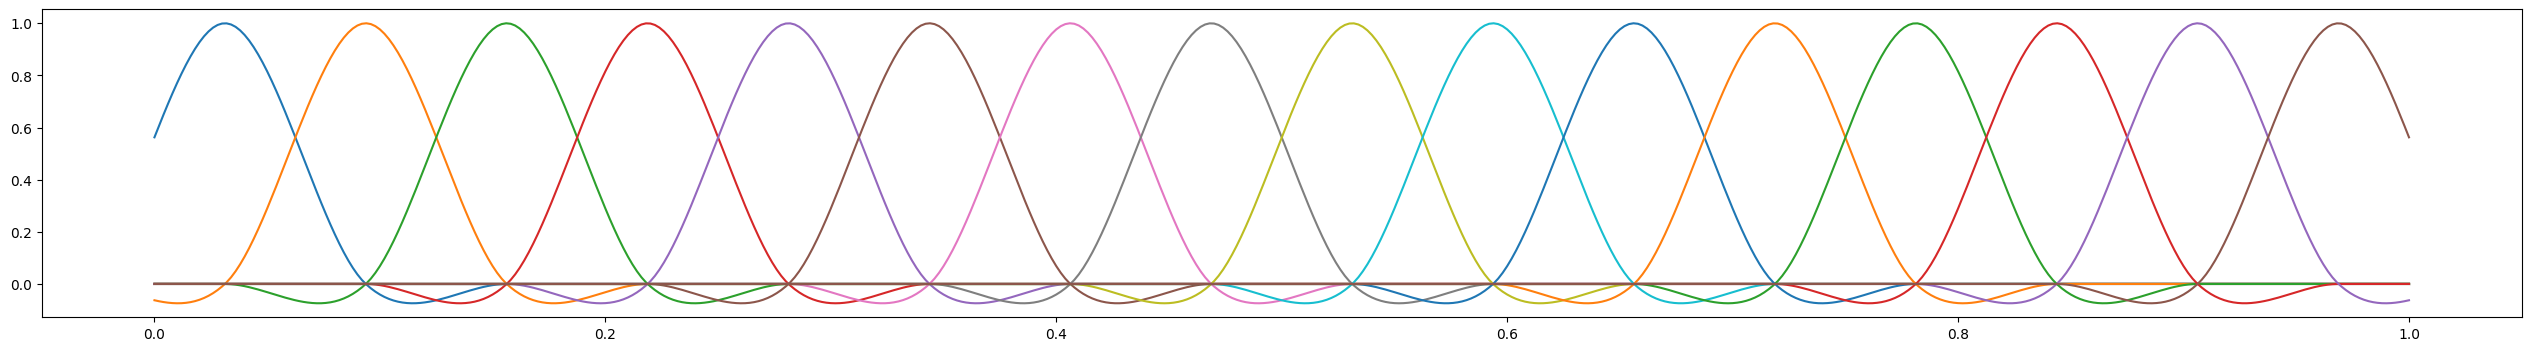



Kind: InterpType.CUBIC 	Boundary: SgBasisType.CONSSTART 


-2 1


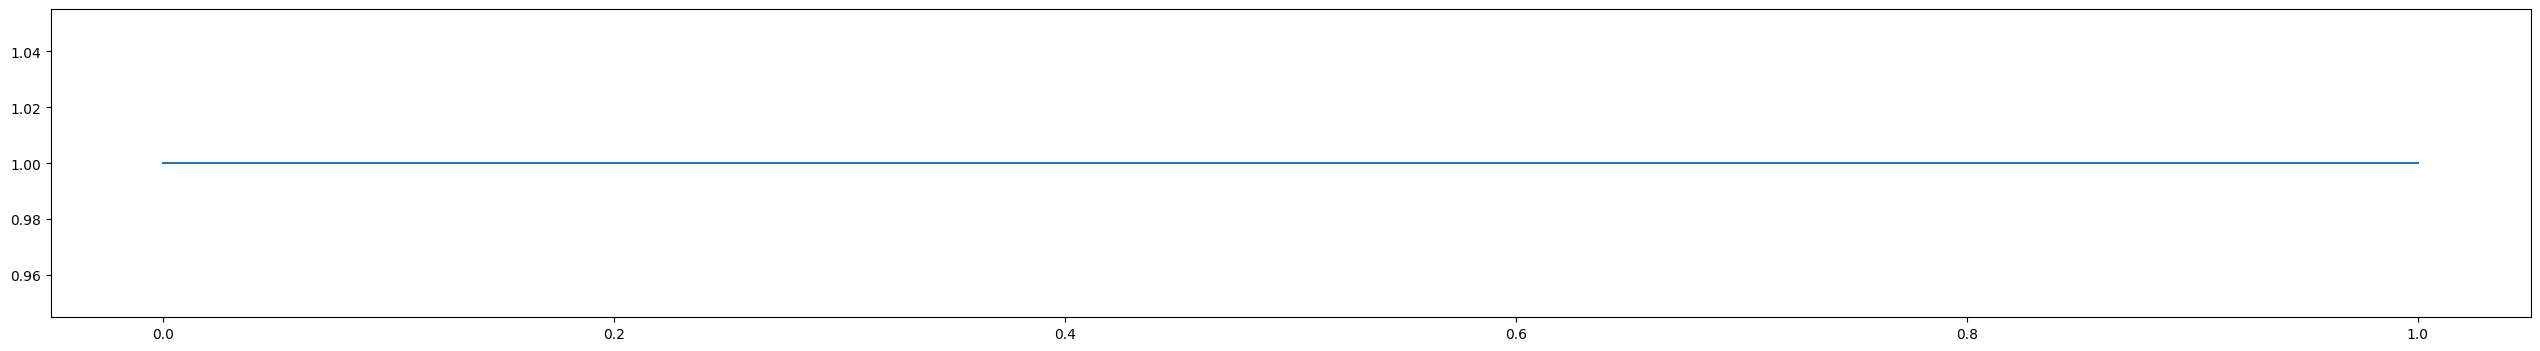

-1 2


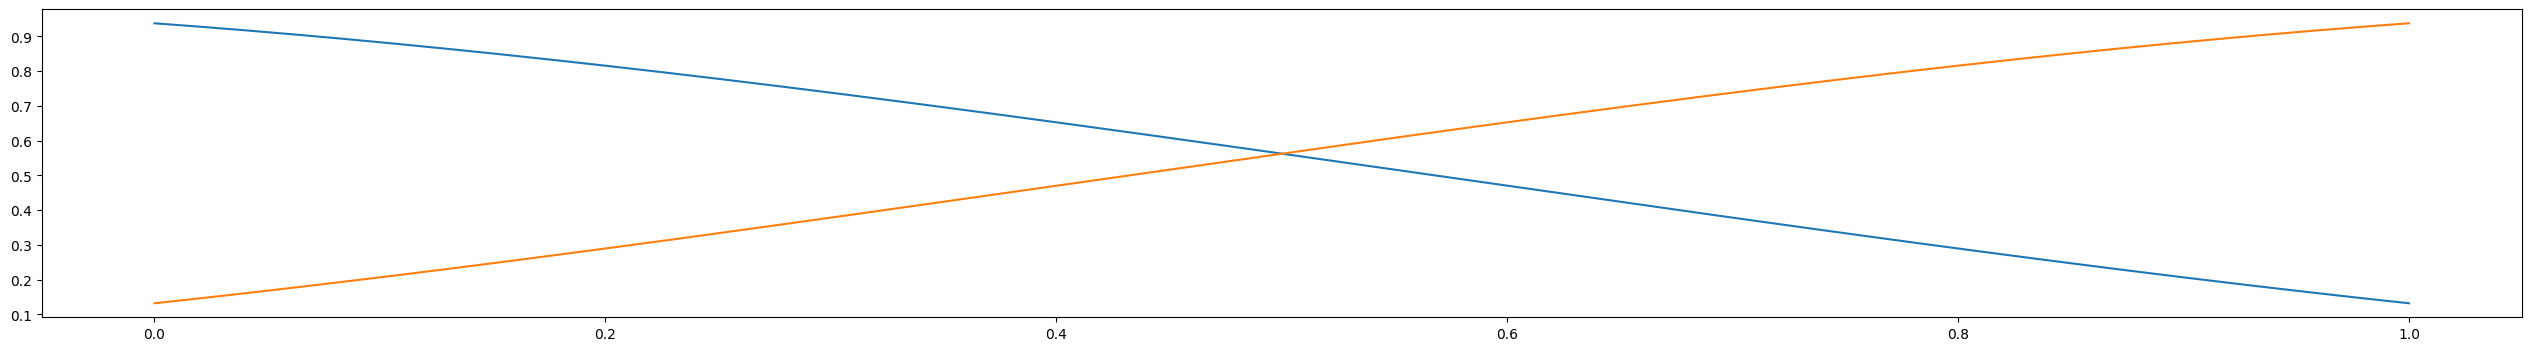

0 1


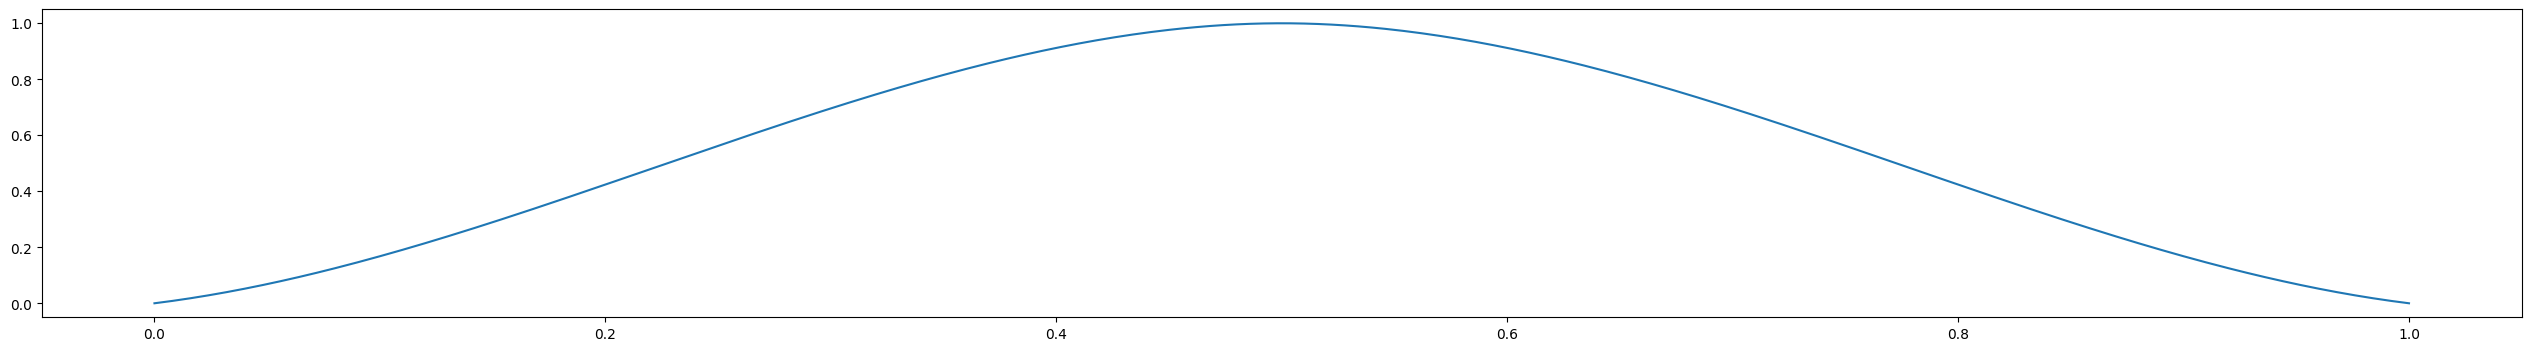

1 2


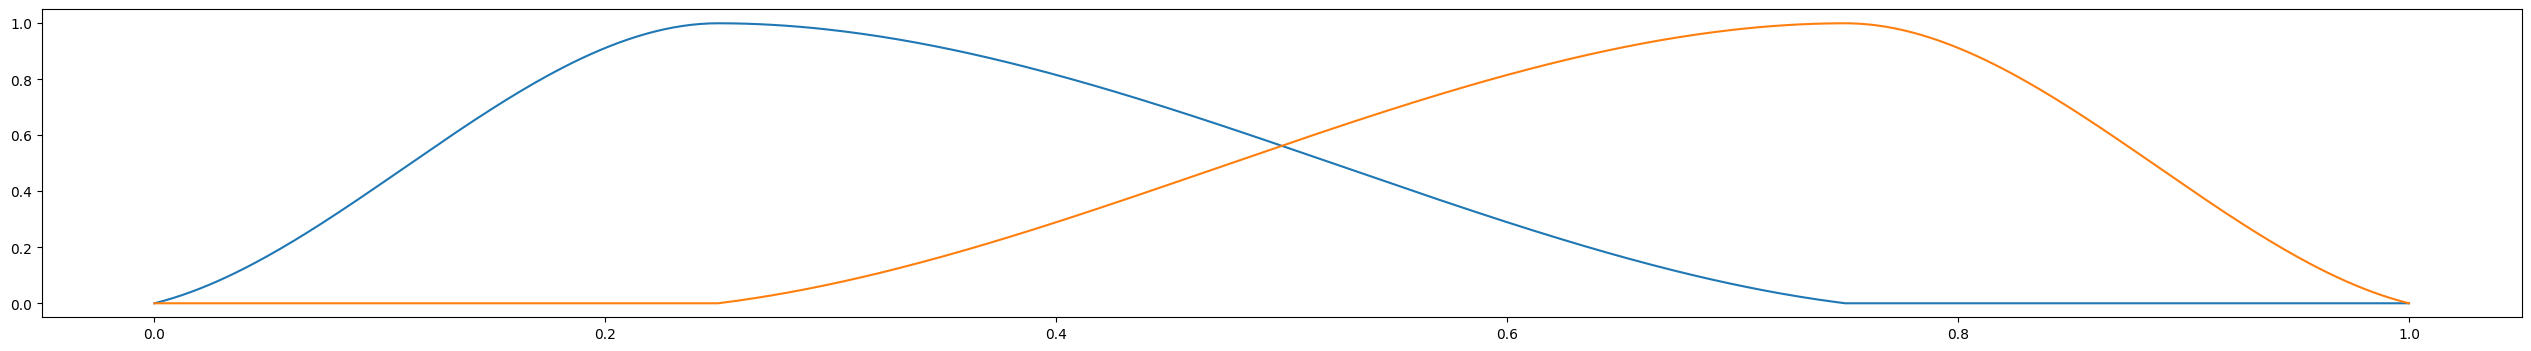

2 4


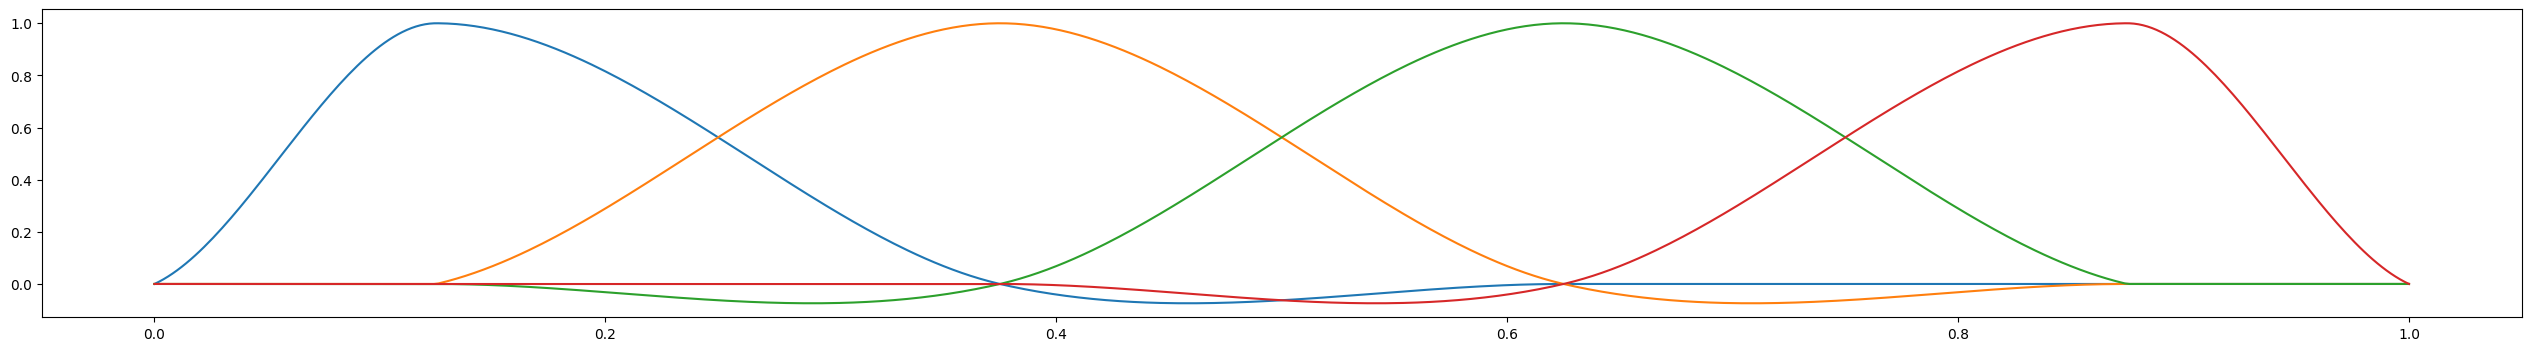

3 8


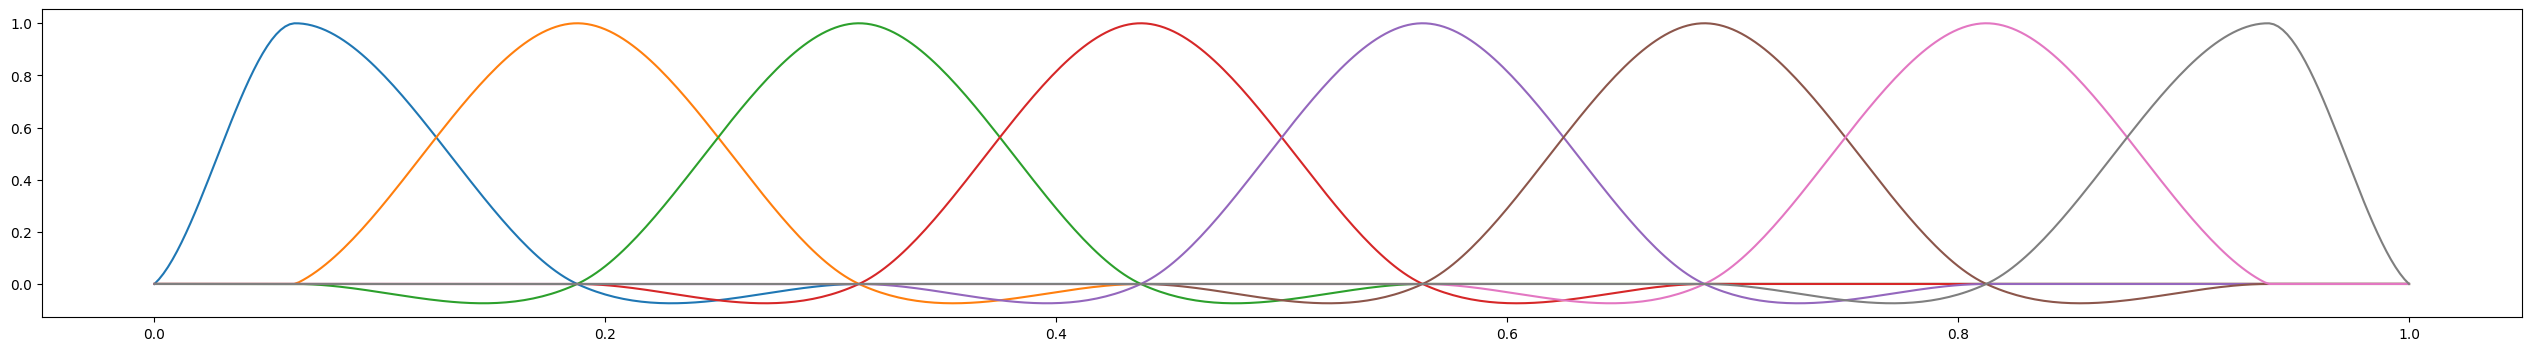

4 16


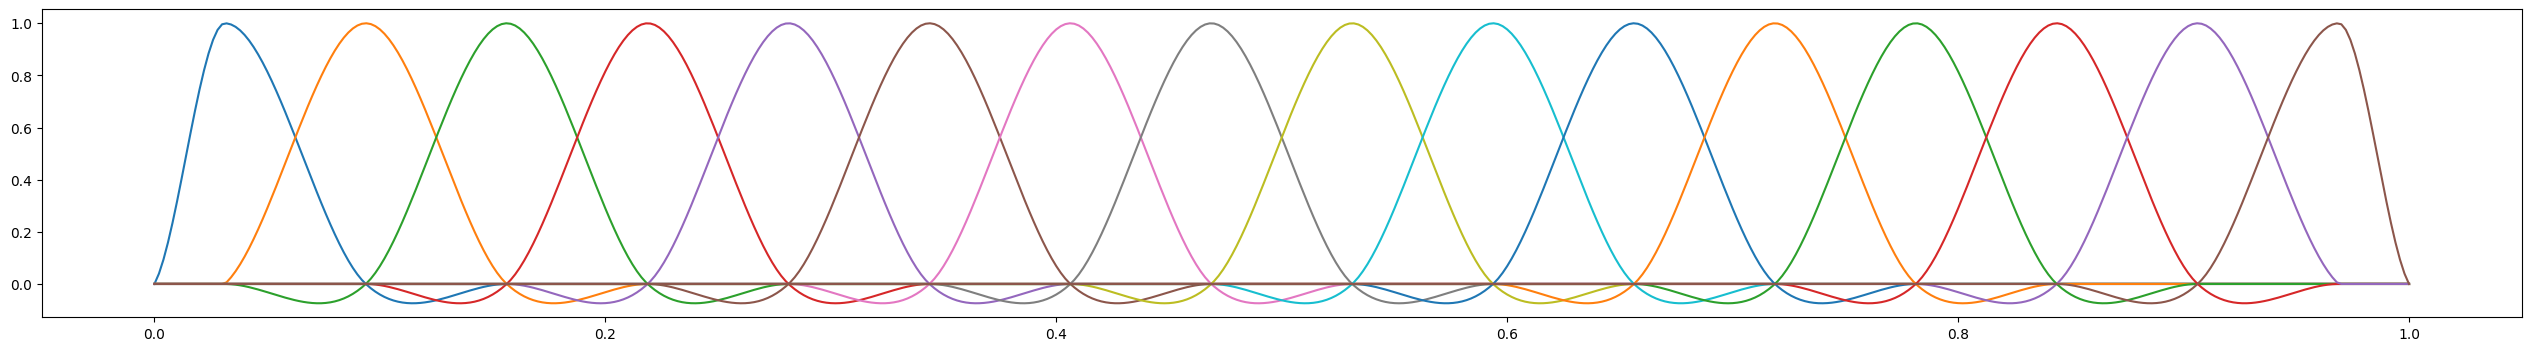



Kind: InterpType.CUBIC 	Boundary: SgBasisType.BOUNDSTART 


0 3


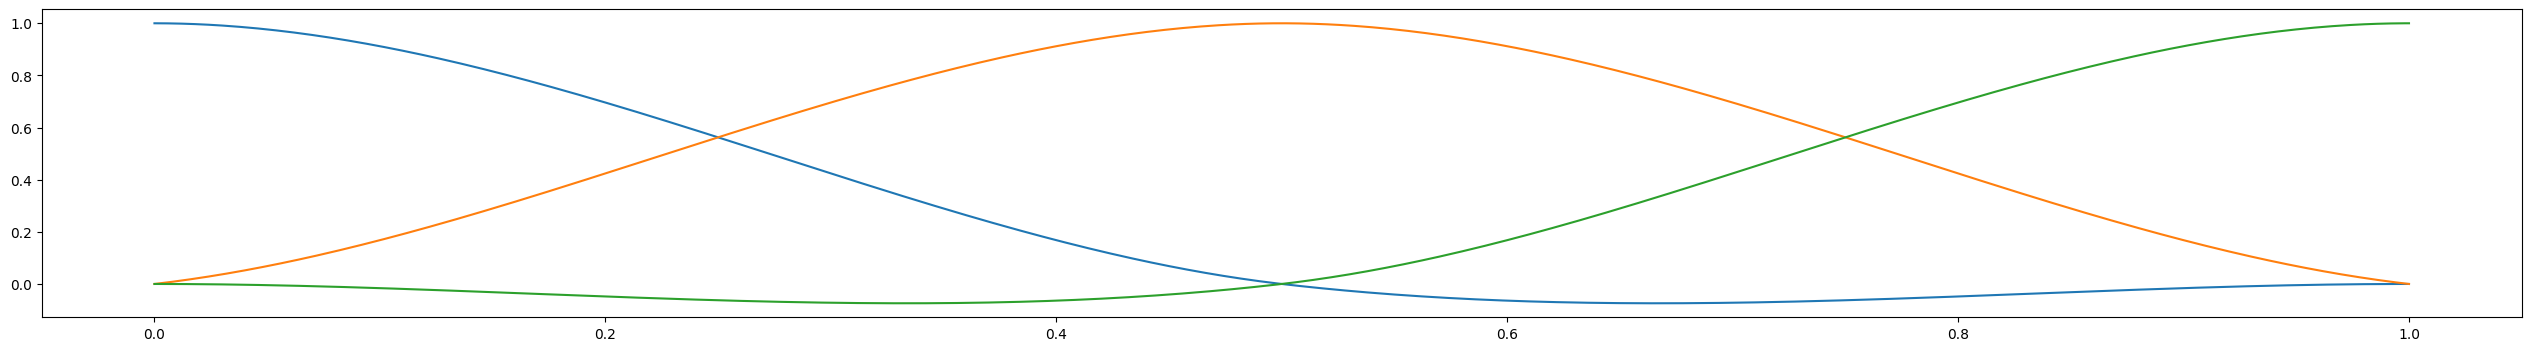

1 2


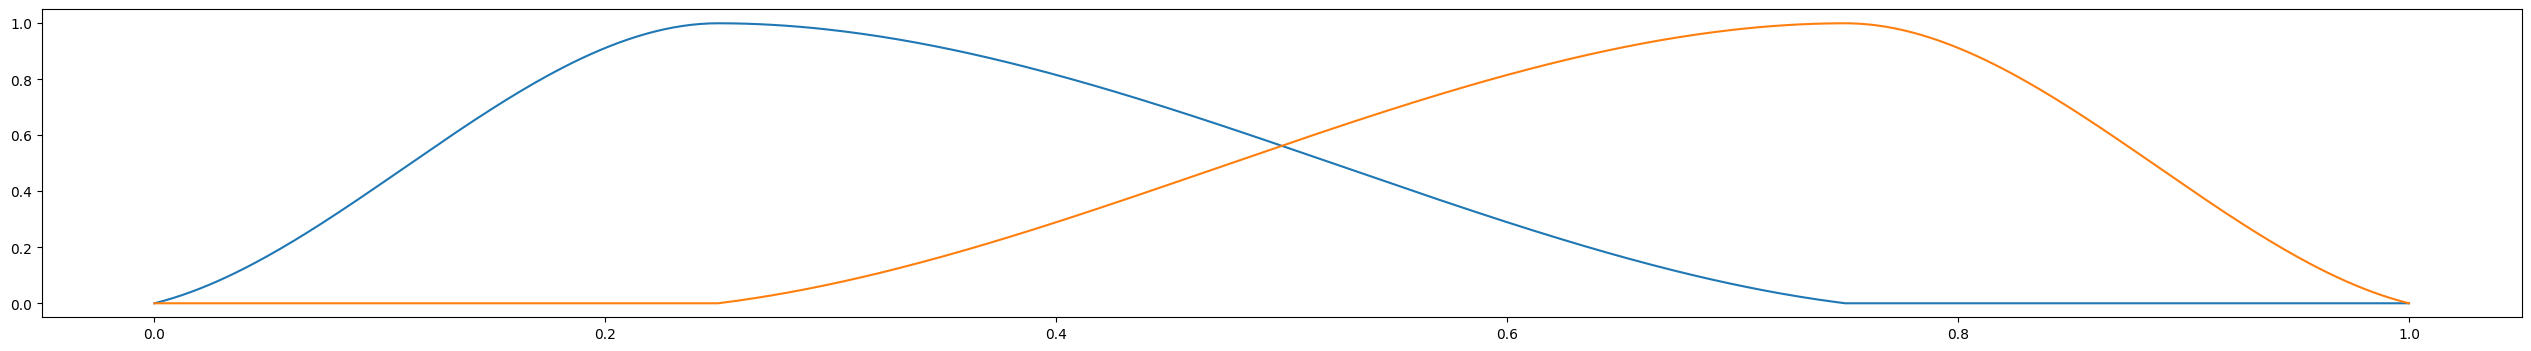

2 4


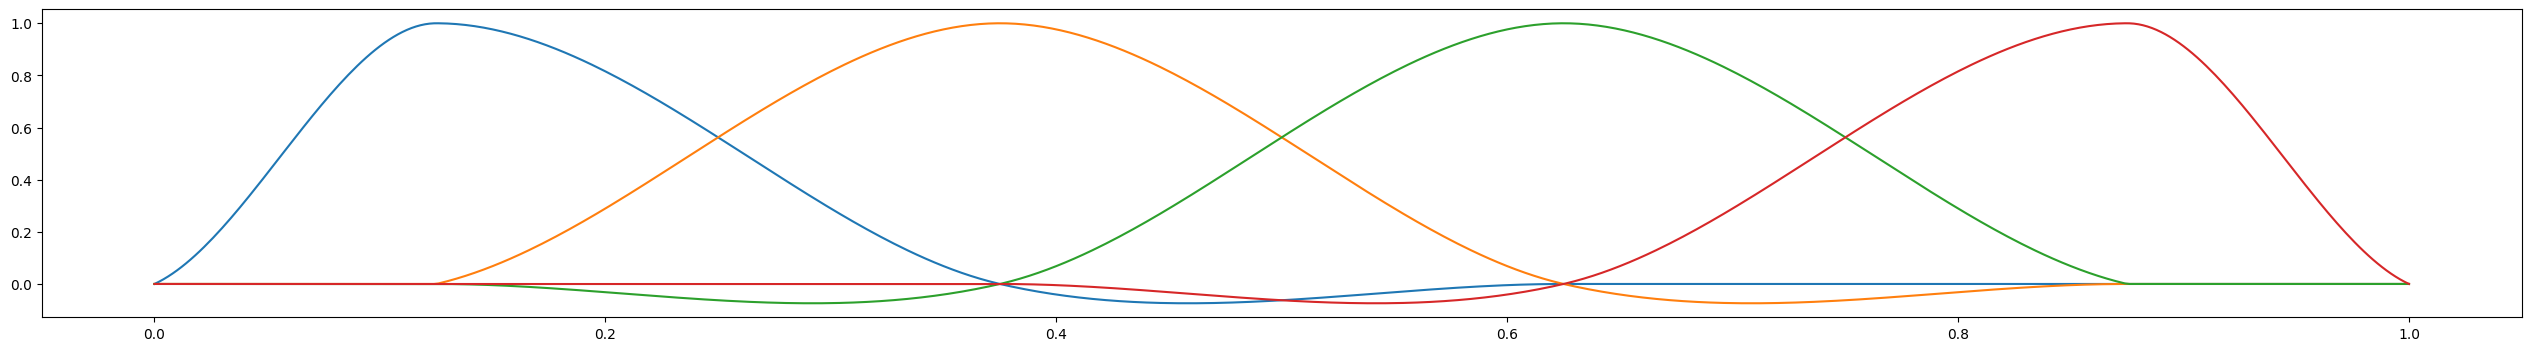

3 8


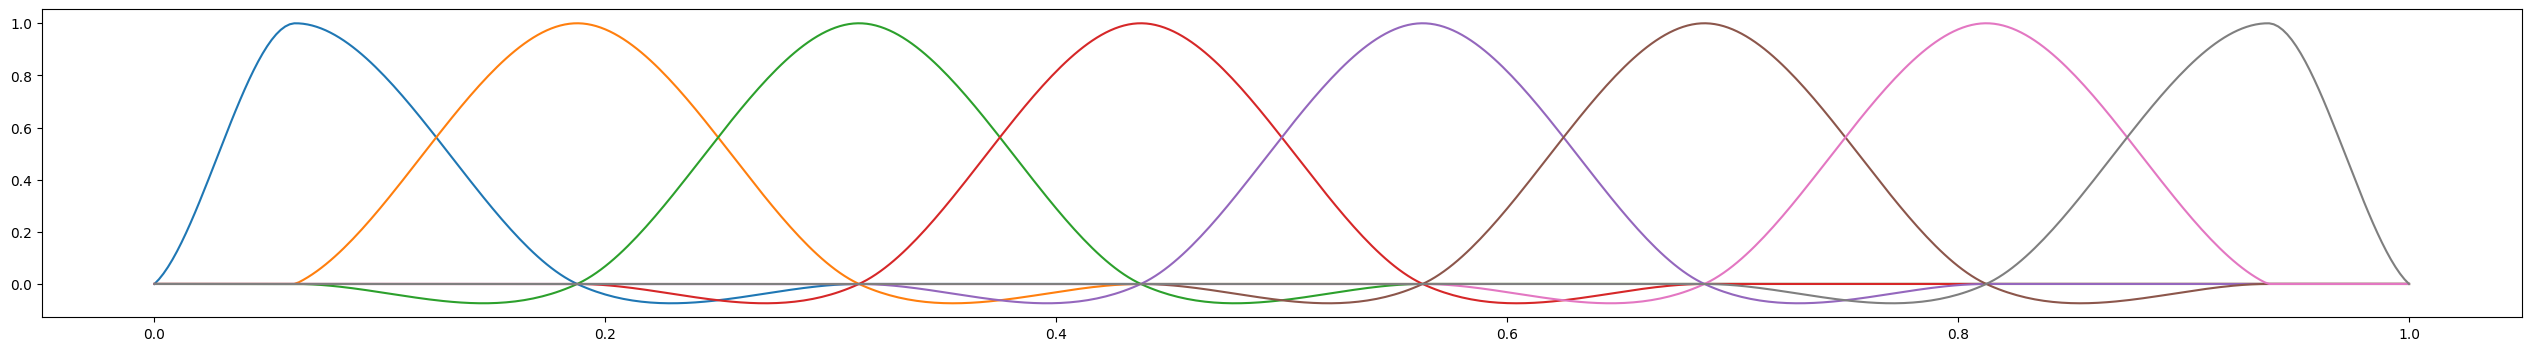

4 16


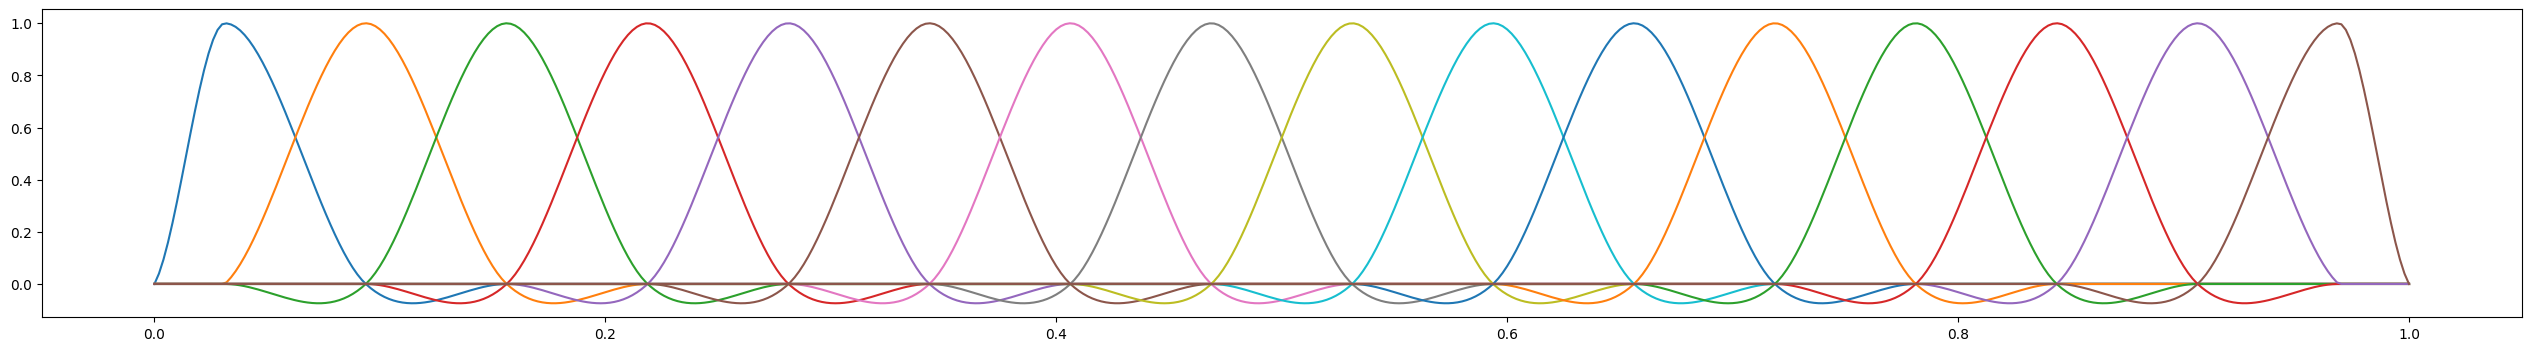

In [6]:
## functions for 1-D
umin = 0
umax = 1
ndim = 1
figsize = (32, 4)

func = lambda x:  np.sin(1*np.pi*x)
vmin, vmax = -1, 1

ndimpoints = 501
epsilon = 0
X = np.linspace(0 + epsilon, 1 - epsilon, num=ndimpoints)
npoints = len(X)


for kind in [0, 1]:
    for basis in [0, 1, 2, 3]:
        print("\n\nKind:", InterpType(kind), "\tBoundary:", SgBasisType(basis), "\n\n")                
        if basis == 2:
            start = -2 
        else:
            start = 0
        
        for gl in range(start, 5):            
            W = get_sg_comb_basis_1d(X, (umin, umax, gl), kind=InterpType(kind), basis = SgBasisType(basis)).toarray()
            J = W.shape[1]
            
            print(gl, J)
            if J == 1:
                plt.figure(figsize=figsize)
                plt.plot(X, W)
                plt.show()
                continue     

            fig, axs = plt.subplots(1, 1, figsize=figsize)    
            for j in range(J):                
                axs.plot(X, W[:, j])

            plt.show()